# Data insights

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [16]:
!pip install pingouin
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import pingouin
import pandas.api.types as ptypes
import plotly.express as px
pd.set_option("display.max_roWs", 30)
pd.set_option("display.max_columns", None)

## Log Data

In [ ]:
log_al_suba = pd.read_csv('data/Masivo_capital_1_conductor_logueado/Informe Tiempo Conductor Logueado_Alimentacion_102 Suba Oriental_202104.csv', sep=';')
log_al_ken = pd.read_csv('data/Masivo_capital_1_conductor_logueado/Informe Tiempo Conductor Logueado_Alimentacion_112 Kennedy_202104.csv', sep=';')
log_zn_suba = pd.read_csv('data/Masivo_capital_1_conductor_logueado/Informe Tiempo Conductor Logueado_Zonal_102 Suba Oriental_202104.csv', sep=';')
log_zn_ken = pd.read_csv('data/Masivo_capital_1_conductor_logueado/Informe Tiempo Conductor Logueado_Zonal_112 Kennedy_202104.csv', sep=';')

FileNotFoundError: ignored

## Activity Data

### Data loading

In [95]:
number = 20210401
dates_al_suba = pd.read_csv('/content/gdrive/MyDrive/data/Masivo_capital_2_actividad_bus/Informe Actividad Bus_Alimentacion_102 Suba Oriental_202104/T '+str(number)+' 102.csv', sep=';', encoding='latin-1')
for i in range(1,30):
    dates_al_suba = pd.concat([dates_al_suba, pd.read_csv('/content/gdrive/MyDrive/data/Masivo_capital_2_actividad_bus/Informe Actividad Bus_Alimentacion_102 Suba Oriental_202104/T '+str(number+i)+' 102.csv', sep=';', encoding='latin-1')])

dates_al_suba

,Fecha,Operador,CodigoBus,NumeroBus,NumEventosBus,ServicioBus,Linea,Coche,ViajeLinea,OrdenViaje,IDViaje,Tipo,Nodo,Descripcion,HoraTeorica,HoraReferencia,HoraLlegada,HoraSalida,Evento,TiempoRegulacion,Alarma,TiempoAperturaPuertas,Conductor,NombreConductor
0,1/04/2021,[102] SO,SO0103,16103,472 eventos,SO0F40005,[153] 2-1 MI,2,0,1,1,Cochera,24,PATIO CIPRÉS,4:01:00,4:01:00,NaN,4:09:19,Inicio Viaje - Cocheras - Cocheras,0:00,NaN,0.0,200838.0,DAVID FERNANDO OCAMPO MARTINEZ
1,1/04/2021,[102] SO,SO0103,16103,472 eventos,SO0F40005,[153] 2-1 MI,2,0,1,1,Parada,11891,CARGA_2-1,4:19:00,4:19:00,4:16:24,NaN,Fin Viaje,0:00,NaN,0.0,200838.0,DAVID FERNANDO OCAMPO MARTINEZ
2,1/04/2021,[102] SO,SO0103,16103,472 eventos,SO0F40005,[153] 2-1 MI,2,1,2,2,Parada,11891,CARGA_2-1,4:19:00,4:19:00,NaN,4:21:37,Inicio Viaje - Linea - Regulacion,5:13,Alarma,0.0,200838.0,DAVID FERNANDO OCAMPO MARTINEZ
3,1/04/2021,[102] SO,SO0103,16103,472 eventos,SO0F40005,[153] 2-1 MI,2,1,2,2,Parada,11869,285A02,4:27:45,4:27:45,4:24:44,4:24:52,NaN,0:00,NaN,0.0,200838.0,DAVID FERNANDO OCAMPO MARTINEZ
4,1/04/2021,[102] SO,SO0103,16103,472 eventos,SO0F40005,[153] 2-1 MI,2,1,2,2,Parada,11926,286A02,4:28:43,4:28:43,4:25:24,4:25:39,NaN,0:00,NaN,0.0,200838.0,DAVID FERNANDO OCAMPO MARTINEZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,30/04/2021,[102] SO,SO0127,16127,362 eventos,CN12C0002,[148] 2-2 JA,1,40,41,41,Parada,11855,103A02_MC,23:16:58,23:16:58,23:16:51,23:17:04,NaN,0:00,NaN,0.0,202622.0,CARLOS ANTONIO DELGADO DIAZ
5012,30/04/2021,[102] SO,SO0127,16127,362 eventos,CN12C0002,[148] 2-2 JA,1,40,41,41,Parada,11864,101A02_MC,23:19:19,23:19:19,23:17:43,23:17:43,NaN,0:00,NaN,0.0,202622.0,CARLOS ANTONIO DELGADO DIAZ
5013,30/04/2021,[102] SO,SO0127,16127,362 eventos,CN12C0002,[148] 2-2 JA,1,40,41,41,Parada,11865,102A02_MC,23:20:50,23:20:50,23:18:13,23:18:13,NaN,0:00,NaN,0.0,202622.0,CARLOS ANTONIO DELGADO DIAZ
5014,30/04/2021,[102] SO,SO0127,16127,362 eventos,CN12C0002,[148] 2-2 JA,1,40,41,41,Parada,11888,DESCENSO_PLAT2,23:26:43,23:26:43,NaN,NaN,NaN,0:00,NaN,NaN,202622.0,CARLOS ANTONIO DELGADO DIAZ


In [13]:
dates_al_ken = pd.read_csv('/content/gdrive/MyDrive/data/Masivo_capital_2_actividad_bus/Informe Actividad Bus_Alimentacion_112 Kennedy_202104/T '+str(number)+' 112.csv', sep=';', encoding='latin-1')
for i in range(1,30):
    dates_al_ken = pd.concat([dates_al_ken, pd.read_csv('/content/gdrive/MyDrive/data/Masivo_capital_2_actividad_bus/Informe Actividad Bus_Alimentacion_112 Kennedy_202104/T '+str(number+i)+' 112.csv', sep=';', encoding='latin-1')])
dates_al_ken

,Fecha,Operador,CodigoBus,NumeroBus,NumEventosBus,ServicioBus,Linea,Coche,ViajeLinea,OrdenViaje,IDViaje,Tipo,Nodo,Descripcion,HoraTeorica,HoraReferencia,HoraLlegada,HoraSalida,Evento,TiempoRegulacion,Alarma,TiempoAperturaPuertas,Conductor,NombreConductor
0,1/04/2021,[112] KE,KE0235,28235,424 eventos,KE73E0008,[94] 9-1 CA,1,0,1,1,Cochera,40,Patio Brasil,3:20:00,3:20:00,NaN,3:08:52,Inicio Viaje - Cocheras - Cocheras,0:00,NaN,0.0,255159.0,EUCLIDES ORTEGON SIERRA
1,1/04/2021,[112] KE,KE0235,28235,424 eventos,KE73E0008,[94] 9-1 CA,1,0,1,1,Parada,11283,ALIMENT_1-1,3:30:00,3:30:00,3:13:20,NaN,Fin Viaje,0:00,NaN,0.0,255159.0,EUCLIDES ORTEGON SIERRA
2,1/04/2021,[112] KE,KE0235,28235,424 eventos,KE73E0008,[94] 9-1 CA,1,1,2,2,Parada,11283,ALIMENT_1-1,3:30:00,3:30:00,NaN,3:30:00,Inicio Viaje - Linea - Regulacion,16:02,Alarma,69.0,255159.0,EUCLIDES ORTEGON SIERRA
3,1/04/2021,[112] KE,KE0235,28235,424 eventos,KE73E0008,[94] 9-1 CA,1,1,2,2,Parada,11217,033A08,3:35:52,3:35:52,3:34:40,3:34:45,NaN,0:00,NaN,0.0,255159.0,EUCLIDES ORTEGON SIERRA
4,1/04/2021,[112] KE,KE0235,28235,424 eventos,KE73E0008,[94] 9-1 CA,1,1,2,2,Parada,11218,164B08,3:37:09,3:37:09,3:35:07,3:35:11,NaN,0:00,NaN,0.0,255159.0,EUCLIDES ORTEGON SIERRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27093,30/04/2021,[112] KE,KE0362,28362,256 eventos,KE78D0094,[92] 8-4 CO,5,18,19,19,Parada,11351,064B08,18:00:04,18:00:04,17:52:56,17:53:03,NaN,0:00,NaN,0.0,251397.0,MARIO FERNANDO MARTINEZ
27094,30/04/2021,[112] KE,KE0362,28362,256 eventos,KE78D0094,[92] 8-4 CO,5,18,19,19,Parada,11236,DESALIM,18:03:55,18:03:55,17:57:09,NaN,NaN,0:00,NaN,1724.0,251397.0,MARIO FERNANDO MARTINEZ
27095,30/04/2021,[112] KE,KE0362,28362,256 eventos,KE78D0094,[92] 8-4 CO,5,18,19,19,Parada,11238,ALIM2,18:04:15,18:04:15,17:54:56,NaN,Fin Viaje - Linea,0:00,NaN,0.0,251397.0,MARIO FERNANDO MARTINEZ
27096,30/04/2021,[112] KE,KE0362,28362,256 eventos,KE78D0094,[92] 8-4 CO,5,0,20,26,Parada,11238,ALIM2,18:06:15,18:06:15,NaN,NaN,Inicio Viaje,0:00,NaN,NaN,251397.0,MARIO FERNANDO MARTINEZ


In [14]:
dates_zn_suba = pd.read_csv('/content/gdrive/MyDrive/data/Masivo_capital_2_actividad_bus/Informe Actividad Bus_Zonal_102 Suba Oriental_202104/'+str(number)+' 102.csv', sep=';', encoding='latin-1')
for i in range(1,30):
    dates_zn_suba = pd.concat([dates_zn_suba, pd.read_csv('/content/gdrive/MyDrive/data/Masivo_capital_2_actividad_bus/Informe Actividad Bus_Zonal_102 Suba Oriental_202104/'+str(number+i)+' 102.csv', sep=';', encoding='latin-1')])
dates_zn_suba

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.



,Fecha,Operador,CodigoBus,NumeroBus,NumEventosBus,ServicioBus,Linea,Coche,ViajeLinea,OrdenViaje,IDViaje,Tipo,Nodo,Descripcion,HoraTeorica,HoraReferencia,HoraLlegada,HoraSalida,Evento,TiempoRegulacion,Alarma,TiempoAperturaPuertas,Conductor,NombreConductor
0,1/04/2021,[102] SO,Z20-2012,202012,282 eventos,SOD570002,[1003] CB100_,2,10,11,11,Parada,30882,472A03_MC,13:17:00,13:17:00,NaN,13:19:12,Inicio Viaje - Regulacion,1:02,NaN,6.0,204318.0,ALIRIO CLAVIJO LAVERDE
1,1/04/2021,[102] SO,Z20-2012,202012,282 eventos,SOD570002,[1003] CB100_,2,10,11,11,Parada,31145,474A03,13:18:41,13:18:41,13:20:06,13:20:10,NaN,0:00,NaN,0.0,204318.0,ALIRIO CLAVIJO LAVERDE
2,1/04/2021,[102] SO,Z20-2012,202012,282 eventos,SOD570002,[1003] CB100_,2,10,11,11,Parada,50692,543B03,13:19:37,13:19:37,13:20:37,13:20:37,NaN,0:00,NaN,0.0,204318.0,ALIRIO CLAVIJO LAVERDE
3,1/04/2021,[102] SO,Z20-2012,202012,282 eventos,SOD570002,[1003] CB100_,2,10,11,11,Parada,31146,173A02,13:21:34,13:21:34,13:21:24,13:21:24,NaN,0:00,NaN,0.0,204318.0,ALIRIO CLAVIJO LAVERDE
4,1/04/2021,[102] SO,Z20-2012,202012,282 eventos,SOD570002,[1003] CB100_,2,10,11,11,Parada,4310,028A02,13:23:13,13:23:13,13:22:11,13:22:11,NaN,0:00,NaN,0.0,204318.0,ALIRIO CLAVIJO LAVERDE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115082,30/04/2021,[102] SO,Z22-7006,227006,499 eventos,SOC8E0002,[574] 19-7,2,33,34,34,Parada,43439,353A02,20:07:54,20:07:54,20:02:15,20:02:15,NaN,0:00,NaN,0.0,202144.0,HUMBERTO GUZMAN VALBUENA
115083,30/04/2021,[102] SO,Z22-7006,227006,499 eventos,SOC8E0002,[574] 19-7,2,33,34,34,Parada,39129,086A02,20:11:35,20:11:35,20:04:22,20:04:23,NaN,0:00,NaN,0.0,202144.0,HUMBERTO GUZMAN VALBUENA
115084,30/04/2021,[102] SO,Z22-7006,227006,499 eventos,SOC8E0002,[574] 19-7,2,33,34,34,Parada,39130,318A02,20:13:00,20:13:00,20:04:43,NaN,Fin Viaje - Linea,0:00,NaN,0.0,202144.0,HUMBERTO GUZMAN VALBUENA
115085,30/04/2021,[102] SO,Z22-7006,227006,499 eventos,SOC8E0002,[574] 19-7,2,0,35,35,Parada,39130,318A02,20:13:00,20:13:30,NaN,20:04:43,Inicio Viaje,0:00,NaN,0.0,202144.0,HUMBERTO GUZMAN VALBUENA


In [15]:
dates_zn_ken = pd.read_csv('/content/gdrive/MyDrive/data/Masivo_capital_2_actividad_bus/Informe Actividad Bus_Zonal_112 Kennedy_202104/'+str(number)+' 112.csv', sep=';', encoding='latin-1')
for i in range(1,30):
    dates_zn_ken = pd.concat([dates_zn_ken, pd.read_csv('/content/gdrive/MyDrive/data/Masivo_capital_2_actividad_bus/Informe Actividad Bus_Zonal_112 Kennedy_202104/'+str(number+i)+' 112.csv', sep=';', encoding='latin-1')])
dates_zn_ken

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.



,Fecha,Operador,CodigoBus,NumeroBus,NumEventosBus,ServicioBus,Linea,Coche,ViajeLinea,OrdenViaje,IDViaje,Tipo,Nodo,Descripcion,HoraTeorica,HoraReferencia,HoraLlegada,HoraSalida,Evento,TiempoRegulacion,Alarma,TiempoAperturaPuertas,Conductor,NombreConductor
0,1/04/2021,[112] KE,Z25-2000,252000,450 eventos,KEHSQ0007,[475] 733,7,5,6,6,Parada,37717,601A08_TIERRA BUENA,15:22:00,15:22:00,NaN,15:25:06,Inicio Viaje - Regulacion,54:26:00,Alarma,0.0,258054.0,MIGUEL ALEJANDRO AGUIRRE PERALTA
1,1/04/2021,[112] KE,Z25-2000,252000,450 eventos,KEHSQ0007,[475] 733,7,5,6,6,Parada,37735,407A08,15:23:12,15:22:54,15:26:21,15:26:44,NaN,0:00,NaN,9.0,258054.0,MIGUEL ALEJANDRO AGUIRRE PERALTA
2,1/04/2021,[112] KE,Z25-2000,252000,450 eventos,KEHSQ0007,[475] 733,7,5,6,6,Parada,37733,510A08,15:24:05,15:23:33,15:27:22,15:27:48,NaN,0:00,NaN,7.0,258054.0,MIGUEL ALEJANDRO AGUIRRE PERALTA
3,1/04/2021,[112] KE,Z25-2000,252000,450 eventos,KEHSQ0007,[475] 733,7,5,6,6,Parada,47713,418A08,15:25:27,15:24:33,15:28:12,15:28:17,NaN,0:00,NaN,0.0,258054.0,MIGUEL ALEJANDRO AGUIRRE PERALTA
4,1/04/2021,[112] KE,Z25-2000,252000,450 eventos,KEHSQ0007,[475] 733,7,5,6,6,Parada,37719,529A08,15:26:47,15:25:32,15:29:08,15:29:51,NaN,0:00,NaN,30.0,258054.0,MIGUEL ALEJANDRO AGUIRRE PERALTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258232,30/04/2021,[112] KE,Z27-4004,274004,79 eventos,KEHU90010,[1056] GL510,10,1,2,2,Parada,52119,610A09_Br. Class,7:08:17,7:08:17,6:49:27,6:50:09,NaN,0:00,NaN,7.0,255019.0,LUIS FELIPE PLAZAS DOMINGUEZ
258233,30/04/2021,[112] KE,Z27-4004,274004,79 eventos,KEHU90010,[1056] GL510,10,1,2,2,Parada,51303,101A09_Br. Class,7:10:18,7:10:18,6:50:30,6:50:30,NaN,0:00,NaN,0.0,255019.0,LUIS FELIPE PLAZAS DOMINGUEZ
258234,30/04/2021,[112] KE,Z27-4004,274004,79 eventos,KEHU90010,[1056] GL510,10,1,2,2,Parada,51325,102A09_Urb. Clarelandia del Sur,7:13:39,7:13:39,6:51:04,6:51:24,NaN,0:00,NaN,8.0,255019.0,LUIS FELIPE PLAZAS DOMINGUEZ
258235,30/04/2021,[112] KE,Z27-4004,274004,79 eventos,KEHU90010,[1056] GL510,10,1,2,2,Parada,51973,511B09_Br. Bosa,7:17:44,7:17:44,6:52:44,NaN,NaN,0:00,NaN,0.0,255019.0,LUIS FELIPE PLAZAS DOMINGUEZ


### Cleanning

Parse the dates

In [35]:
dates_al_suba['Fecha'] = pd.to_datetime(dates_al_suba['Fecha'], dayfirst=True)
dates_al_ken['Fecha'] = pd.to_datetime(dates_al_ken['Fecha'], dayfirst=True)
dates_zn_suba['Fecha'] = pd.to_datetime(dates_zn_suba['Fecha'], dayfirst=True)
dates_zn_ken['Fecha'] = pd.to_datetime(dates_zn_ken['Fecha'], dayfirst=True)

Convert the 'NumEventosBus' column in an int column

In [36]:
dates_al_suba['NumEventosBus'] = dates_al_suba['NumEventosBus'].astype('string').str.extract('([0-9]+)')
dates_al_ken['NumEventosBus'] = dates_al_ken['NumEventosBus'].astype('string').str.extract('([0-9]+)')
dates_zn_suba['NumEventosBus'] = dates_zn_suba['NumEventosBus'].astype('string').str.extract('([0-9]+)')
dates_zn_ken['NumEventosBus'] = dates_zn_ken['NumEventosBus'].astype('string').str.extract('([0-9]+)')

KeyboardInterrupt: ignored

In [ ]:
dates_al_suba['NumEventosBus'] = dates_al_suba['NumEventosBus'].astype('int')
dates_zn_suba['NumEventosBus'] = dates_zn_suba['NumEventosBus'].astype('int')
dates_al_ken['NumEventosBus'] = dates_al_ken['NumEventosBus'].astype('int')
dates_zn_ken['NumEventosBus'] = dates_zn_ken['NumEventosBus'].astype('int')

Converting the categorical variables

In [ ]:
dates_al_suba['Evento'] = dates_al_suba['Evento'].astype('category')
dates_zn_suba['Evento'] = dates_zn_suba['Evento'].astype('category')
dates_al_ken['Evento'] = dates_al_ken['Evento'].astype('category')
dates_zn_ken['Evento'] = dates_zn_ken['Evento'].astype('category')

In [ ]:
dates_al_suba['CodigoBus'] = dates_al_suba['CodigoBus'].astype('category')
dates_zn_suba['CodigoBus'] = dates_zn_suba['CodigoBus'].astype('category')
dates_al_ken['CodigoBus'] = dates_al_ken['CodigoBus'].astype('category')
dates_zn_ken['CodigoBus'] = dates_zn_ken['CodigoBus'].astype('category')

In [ ]:
dates_al_suba['NumeroBus'] = dates_al_suba['NumeroBus'].astype('category')
dates_zn_suba['NumeroBus'] = dates_zn_suba['NumeroBus'].astype('category')
dates_al_ken['NumeroBus'] = dates_al_ken['NumeroBus'].astype('category')
dates_zn_ken['NumeroBus'] = dates_zn_ken['NumeroBus'].astype('category')

In [ ]:
dates_al_suba['ServicioBus'] = dates_al_suba['ServicioBus'].astype('category')
dates_zn_suba['ServicioBus'] = dates_zn_suba['ServicioBus'].astype('category')
dates_al_ken['ServicioBus'] = dates_al_ken['ServicioBus'].astype('category')
dates_zn_ken['ServicioBus'] = dates_zn_ken['ServicioBus'].astype('category')

In [ ]:
dates_al_suba['Tipo'] = dates_al_suba['Tipo'].astype('category')
dates_zn_suba['Tipo'] = dates_zn_suba['Tipo'].astype('category')
dates_al_ken['Tipo'] = dates_al_ken['Tipo'].astype('category')
dates_zn_ken['Tipo'] = dates_zn_ken['Tipo'].astype('category')

Convert 'Alarma' column in a bool type column

In [ ]:
dates_al_suba['Alarma'] = dates_al_suba['Alarma'].replace('Alarma',True)
dates_zn_suba['Alarma'] = dates_zn_suba['Alarma'].replace('Alarma',True)
dates_al_ken['Alarma'] = dates_al_ken['Alarma'].replace('Alarma',True)
dates_zn_ken['Alarma'] = dates_zn_ken['Alarma'].replace('Alarma',True)

In [ ]:
dates_al_suba['Alarma'] = dates_al_suba['Alarma'].fillna(False)
dates_zn_suba['Alarma'] = dates_zn_suba['Alarma'].fillna(False)
dates_al_ken['Alarma'] = dates_al_ken['Alarma'].fillna(False)
dates_zn_ken['Alarma'] = dates_zn_ken['Alarma'].fillna(False)

Clean the 'Operador' column

In [ ]:
dates_al_suba['Operador'] = dates_al_suba['Operador'].str.extract('\[.+\] (\S+)')
dates_al_ken['Operador'] = dates_al_ken['Operador'].str.extract('\[.+\] (\S+)')
dates_zn_suba['Operador'] = dates_zn_suba['Operador'].str.extract('\[.+\] (\S+)')
dates_zn_ken['Operador'] = dates_zn_ken['Operador'].str.extract('\[.+\] (\S+)')

Clean all the time columns

In [ ]:
dates_al_suba['HoraTeorica'] = dates_al_suba['HoraTeorica'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_al_suba['HoraTeorica'] = dates_al_suba['HoraTeorica'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_al_suba['HoraTeorica'] = dates_al_suba['HoraTeorica'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_al_suba['HoraReferencia'] = dates_al_suba['HoraReferencia'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_al_suba['HoraReferencia'] = dates_al_suba['HoraReferencia'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_al_suba['HoraReferencia'] = dates_al_suba['HoraReferencia'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_al_suba['HoraLlegada'] = dates_al_suba['HoraLlegada'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_al_suba['HoraLlegada'] = dates_al_suba['HoraLlegada'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_al_suba['HoraLlegada'] = dates_al_suba['HoraLlegada'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_al_suba['HoraSalida'] = dates_al_suba['HoraSalida'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_al_suba['HoraSalida'] = dates_al_suba['HoraSalida'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_al_suba['HoraSalida'] = dates_al_suba['HoraSalida'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_al_suba['HoraTeorica'] = pd.to_datetime(dates_al_suba['HoraTeorica'])
dates_al_suba['HoraReferencia'] = pd.to_datetime(dates_al_suba['HoraReferencia'])
dates_al_suba['HoraLlegada'] = pd.to_datetime(dates_al_suba['HoraLlegada'])
dates_al_suba['HoraSalida'] = pd.to_datetime(dates_al_suba['HoraSalida'])

dates_al_ken['HoraTeorica'] = dates_al_ken['HoraTeorica'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_al_ken['HoraTeorica'] = dates_al_ken['HoraTeorica'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_al_ken['HoraTeorica'] = dates_al_ken['HoraTeorica'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_al_ken['HoraReferencia'] = dates_al_ken['HoraReferencia'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_al_ken['HoraReferencia'] = dates_al_ken['HoraReferencia'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_al_ken['HoraReferencia'] = dates_al_ken['HoraReferencia'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_al_ken['HoraLlegada'] = dates_al_ken['HoraLlegada'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_al_ken['HoraLlegada'] = dates_al_ken['HoraLlegada'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_al_ken['HoraLlegada'] = dates_al_ken['HoraLlegada'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_al_ken['HoraSalida'] = dates_al_ken['HoraSalida'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_al_ken['HoraSalida'] = dates_al_ken['HoraSalida'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_al_ken['HoraSalida'] = dates_al_ken['HoraSalida'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_al_ken['HoraSalida'] = dates_al_ken['HoraSalida'].replace(to_replace=r'(^27)', value='03', regex=True)
dates_al_ken['HoraTeorica'] = pd.to_datetime(dates_al_ken['HoraTeorica'])
dates_al_ken['HoraReferencia'] = pd.to_datetime(dates_al_ken['HoraReferencia'])
dates_al_ken['HoraLlegada'] = pd.to_datetime(dates_al_ken['HoraLlegada'])
dates_al_ken['HoraSalida'] = pd.to_datetime(dates_al_ken['HoraSalida'])
dates_al_ken['HoraTeorica'] = pd.to_datetime(dates_al_ken['HoraTeorica'])
dates_al_ken['HoraReferencia'] = pd.to_datetime(dates_al_ken['HoraReferencia'])

dates_zn_suba['HoraTeorica'] = dates_zn_suba['HoraTeorica'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_zn_suba['HoraTeorica'] = dates_zn_suba['HoraTeorica'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_zn_suba['HoraTeorica'] = dates_zn_suba['HoraTeorica'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_zn_suba['HoraReferencia'] = dates_zn_suba['HoraReferencia'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_zn_suba['HoraReferencia'] = dates_zn_suba['HoraReferencia'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_zn_suba['HoraReferencia'] = dates_zn_suba['HoraReferencia'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_zn_suba['HoraLlegada'] = dates_zn_suba['HoraLlegada'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_zn_suba['HoraLlegada'] = dates_zn_suba['HoraLlegada'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_zn_suba['HoraLlegada'] = dates_zn_suba['HoraLlegada'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_zn_suba['HoraSalida'] = dates_zn_suba['HoraSalida'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_zn_suba['HoraSalida'] = dates_zn_suba['HoraSalida'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_zn_suba['HoraSalida'] = dates_zn_suba['HoraSalida'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_zn_suba['HoraTeorica'] = pd.to_datetime(dates_zn_suba['HoraTeorica'])
dates_zn_suba['HoraReferencia'] = pd.to_datetime(dates_zn_suba['HoraReferencia'])
dates_zn_suba['HoraLlegada'] = pd.to_datetime(dates_zn_suba['HoraLlegada'])
dates_zn_suba['HoraSalida'] = pd.to_datetime(dates_zn_suba['HoraSalida'])
dates_zn_suba['HoraTeorica'] = pd.to_datetime(dates_zn_suba['HoraTeorica'])
dates_zn_suba['HoraReferencia'] = pd.to_datetime(dates_zn_suba['HoraReferencia'])

dates_zn_ken['HoraTeorica'] = dates_zn_ken['HoraTeorica'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_zn_ken['HoraTeorica'] = dates_zn_ken['HoraTeorica'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_zn_ken['HoraTeorica'] = dates_zn_ken['HoraTeorica'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_zn_ken['HoraReferencia'] = dates_zn_ken['HoraReferencia'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_zn_ken['HoraReferencia'] = dates_zn_ken['HoraReferencia'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_zn_ken['HoraReferencia'] = dates_zn_ken['HoraReferencia'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_zn_ken['HoraLlegada'] = dates_zn_ken['HoraLlegada'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_zn_ken['HoraLlegada'] = dates_zn_ken['HoraLlegada'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_zn_ken['HoraLlegada'] = dates_zn_ken['HoraLlegada'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_zn_ken['HoraSalida'] = dates_zn_ken['HoraSalida'].replace(to_replace=r'(^24)', value='00', regex=True)
dates_zn_ken['HoraSalida'] = dates_zn_ken['HoraSalida'].replace(to_replace=r'(^25)', value='01', regex=True)
dates_zn_ken['HoraSalida'] = dates_zn_ken['HoraSalida'].replace(to_replace=r'(^26)', value='02', regex=True)
dates_zn_ken['HoraTeorica'] = pd.to_datetime(dates_zn_ken['HoraTeorica'])
dates_zn_ken['HoraReferencia'] = pd.to_datetime(dates_zn_ken['HoraReferencia'])
dates_zn_ken['HoraLlegada'] = pd.to_datetime(dates_zn_ken['HoraLlegada'])
dates_zn_ken['HoraSalida'] = pd.to_datetime(dates_zn_ken['HoraSalida'])

In [ ]:
dates_al_suba['Dia'] = dates_al_suba['Fecha'].dt.dayofweek
dates_al_suba['Hora'] = dates_al_suba['HoraTeorica'].dt.hour
dates_al_ken['Dia'] = dates_al_ken['Fecha'].dt.dayofweek
dates_al_ken['Hora'] = dates_al_ken['HoraTeorica'].dt.hour
dates_zn_suba['Dia'] = dates_zn_suba['Fecha'].dt.dayofweek
dates_zn_suba['Hora'] = dates_zn_suba['HoraTeorica'].dt.hour
dates_zn_ken['Dia'] = dates_zn_ken['Fecha'].dt.dayofweek
dates_zn_ken['Hora'] = dates_zn_ken['HoraTeorica'].dt.hour

### Univariate analysis

##### Numerical

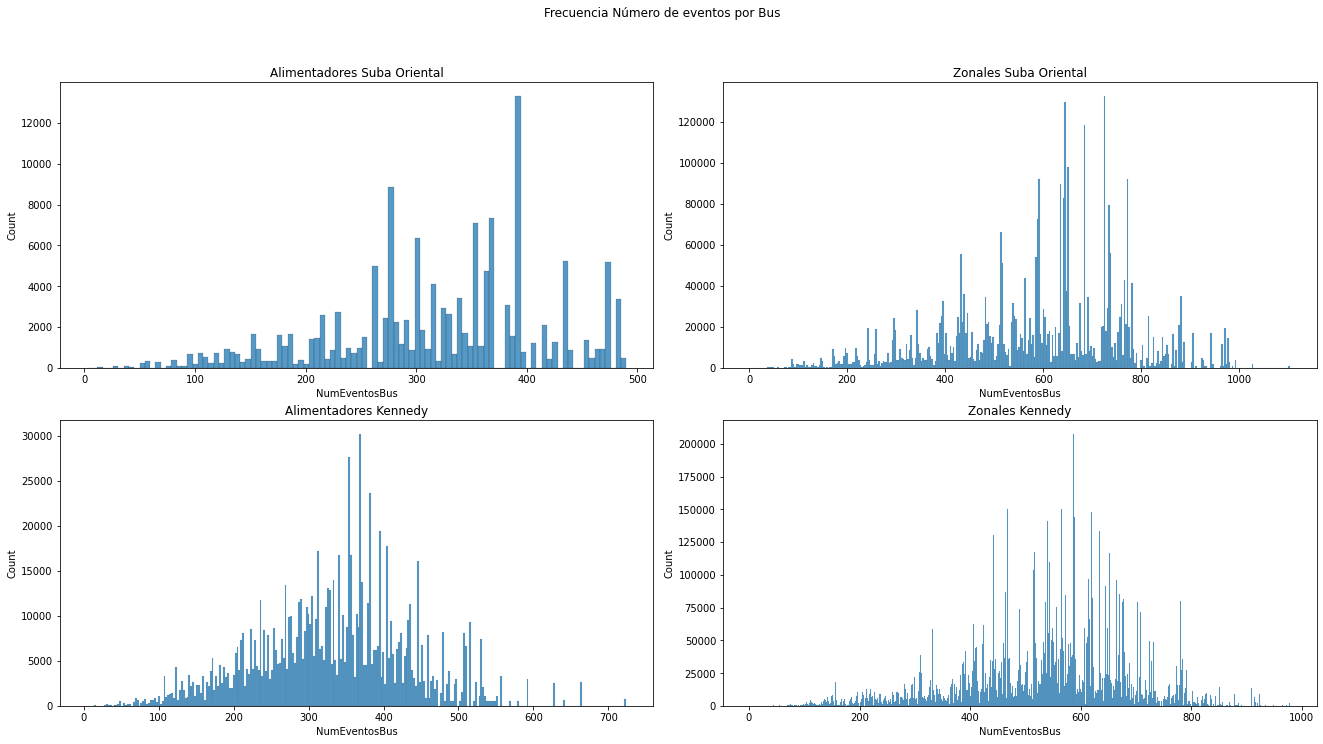

In [ ]:
fig, ax = plt.subplots(2,2)
sns.histplot(data=dates_al_suba, x="NumEventosBus", ax=ax[0,0])
ax[0,0].set_title('Alimentadores Suba Oriental')
sns.histplot(data=dates_zn_suba, x="NumEventosBus", ax=ax[0,1])
ax[0,1].set_title('Zonales Suba Oriental')
sns.histplot(data=dates_al_ken, x="NumEventosBus", ax=ax[1,0])
ax[1,0].set_title('Alimentadores Kennedy')
sns.histplot(data=dates_zn_ken, x="NumEventosBus", ax=ax[1,1])
ax[1,1].set_title('Zonales Kennedy')
fig.suptitle('Frecuencia Número de eventos por Bus')
fig.set_size_inches(18.5, 10.5)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

In [ ]:
sns.pairplot(dates_al_suba)

##### Categorical

_Operador_

In [ ]:
fig, ax = plt.subplots(2,2)
sns.barplot(dates_al_suba['Operador'].value_counts().index, dates_al_suba['Operador'].value_counts().values, ax=ax[0,0])
sns.barplot(dates_al_ken['Operador'].value_counts().index, dates_al_ken['Operador'].value_counts().values, ax=ax[0,1])
sns.barplot(dates_zn_ken['Operador'].value_counts().index, dates_zn_ken['Operador'].value_counts().values, ax=ax[1,0])
sns.barplot(dates_zn_suba['Operador'].value_counts().index, dates_zn_suba['Operador'].value_counts().values, ax=ax[1,1])
ax[0,0].set_title('Alimentadores Suba Oriental')
ax[1,1].set_title('Zonales Suba Oriental')
ax[0,1].set_title('Alimentadores Kennedy')
ax[1,0].set_title('Zonales Kennedy')
fig.suptitle('Operador')
fig.set_size_inches(18.5, 10.5)

There is only one operator per zone

_NumeroBus_

In [ ]:
fig, ax = plt.subplots(2,2)
sns.barplot(dates_al_suba['NumeroBus'].value_counts().index,dates_al_suba['NumeroBus'].value_counts().values, ax=ax[0,0])
sns.barplot(dates_zn_suba['NumeroBus'].value_counts().index,dates_zn_suba['NumeroBus'].value_counts().values, ax=ax[0,1])
sns.barplot(dates_al_ken['NumeroBus'].value_counts().index,dates_al_ken['NumeroBus'].value_counts().values, ax=ax[1,0])
sns.barplot(dates_zn_ken['NumeroBus'].value_counts().index,dates_zn_ken['NumeroBus'].value_counts().values, ax=ax[1,1])
ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[1,0].tick_params(axis='x', rotation=90)
ax[1,1].tick_params(axis='x', rotation=90)
ax[0,0].set_title('Alimentadores Suba Oriental')
ax[0,1].set_title('Zonales Suba Oriental')
ax[1,0].set_title('Alimentadores Kennedy')
ax[1,1].set_title('Zonales Kennedy')
fig.suptitle('Frecuencia por número de bus')
fig.set_size_inches(18.5, 10.5)
fig.tight_layout(pad=3.0)
fig.subplots_adjust(top=0.88)

**Analysis**

_Evento_

In [ ]:
fig, ax = plt.subplots(2,2)
sns.barplot(dates_al_suba['Evento'].value_counts().index,dates_al_suba['Evento'].value_counts().values, ax=ax[0,0])
sns.barplot(dates_zn_suba['Evento'].value_counts().index,dates_zn_suba['Evento'].value_counts().values, ax=ax[0,1])
sns.barplot(dates_al_ken['Evento'].value_counts().index,dates_al_ken['Evento'].value_counts().values, ax=ax[1,0])
sns.barplot(dates_zn_ken['Evento'].value_counts().index,dates_zn_ken['Evento'].value_counts().values, ax=ax[1,1])
ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[1,0].tick_params(axis='x', rotation=90)
ax[1,1].tick_params(axis='x', rotation=90)
ax[0,0].set_title('Alimentadores Suba Oriental')
ax[0,1].set_title('Zonales Suba Oriental')
ax[1,0].set_title('Alimentadores Kennedy')
ax[1,1].set_title('Zonales Kennedy')
fig.suptitle('Frecuencia Evento')
fig.set_size_inches(18.5, 18.5)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

**Analysis**

_Tipo_

In [ ]:
fig, ax = plt.subplots(2,2)
sns.barplot(dates_al_suba['Tipo'].value_counts().index,dates_al_suba['Tipo'].value_counts().values, ax=ax[0,0])
sns.barplot(dates_zn_suba['Tipo'].value_counts().index,dates_zn_suba['Tipo'].value_counts().values, ax=ax[0,1])
sns.barplot(dates_al_ken['Tipo'].value_counts().index,dates_al_ken['Tipo'].value_counts().values, ax=ax[1,0])
sns.barplot(dates_zn_ken['Tipo'].value_counts().index,dates_zn_ken['Tipo'].value_counts().values, ax=ax[1,1])
ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[1,0].tick_params(axis='x', rotation=90)
ax[1,1].tick_params(axis='x', rotation=90)
ax[0,0].set_title('Alimentadores Suba Oriental')
ax[0,1].set_title('Zonales Suba Oriental')
ax[1,0].set_title('Alimentadores Kennedy')
ax[1,1].set_title('Zonales Kennedy')
fig.suptitle('Frecuencia Tipo')
fig.set_size_inches(18.5, 10.5)
fig.subplots_adjust(top=0.88)

#### Time

##### Distribution per year

In [ ]:
fig, ax = plt.subplots(2,2)
sns.lineplot(dates_al_suba['Fecha'].value_counts().index,dates_al_suba['Fecha'].value_counts().values, ax=ax[0,0])
sns.lineplot(dates_zn_suba['Fecha'].value_counts().index,dates_zn_suba['Fecha'].value_counts().values, ax=ax[0,1])
sns.lineplot(dates_al_ken['Fecha'].value_counts().index,dates_al_ken['Fecha'].value_counts().values, ax=ax[1,0])
sns.lineplot(dates_zn_ken['Fecha'].value_counts().index,dates_zn_ken['Fecha'].value_counts().values, ax=ax[1,1])
ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[1,0].tick_params(axis='x', rotation=90)
ax[1,1].tick_params(axis='x', rotation=90)
ax[0,0].set_title('Alimentadores Suba Oriental')
ax[0,1].set_title('Zonales Suba Oriental')
ax[1,0].set_title('Alimentadores Kennedy')
ax[1,1].set_title('Zonales Kennedy')
fig.suptitle('Distribución del número de eventos por fecha')
fig.set_size_inches(18.5, 10.5)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

##### Distribution per hour

KeyError: ignored

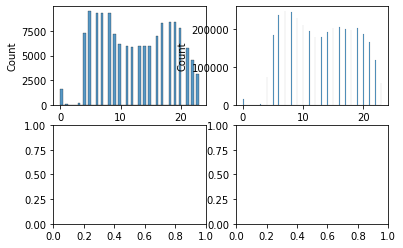

In [ ]:
fig, ax = plt.subplots(2,2)
sns.histplot(dates_al_suba['Hora'].values, ax=ax[0,0])
sns.histplot(dates_zn_suba['Hora'].values, ax=ax[0,1])
sns.histplot(dates_zn_ken['Hora'].values, ax=ax[1,1])
sns.histplot(dates_al_ken['Hora'].values, ax=ax[1,0])
ax[0,0].tick_params(axis='x', rotation=90)
ax[0,1].tick_params(axis='x', rotation=90)
ax[1,0].tick_params(axis='x', rotation=90)
ax[1,1].tick_params(axis='x', rotation=90)
ax[0,0].set_title('Alimentadores Suba Oriental')
ax[0,1].set_title('Zonales Suba Oriental')
ax[1,0].set_title('Alimentadores Kennedy')
ax[1,1].set_title('Zonales Kennedy')
fig.suptitle('Frecuencia Número de eventos por Bus')
fig.set_size_inches(18.5, 10.5)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

##### Distribution per week days

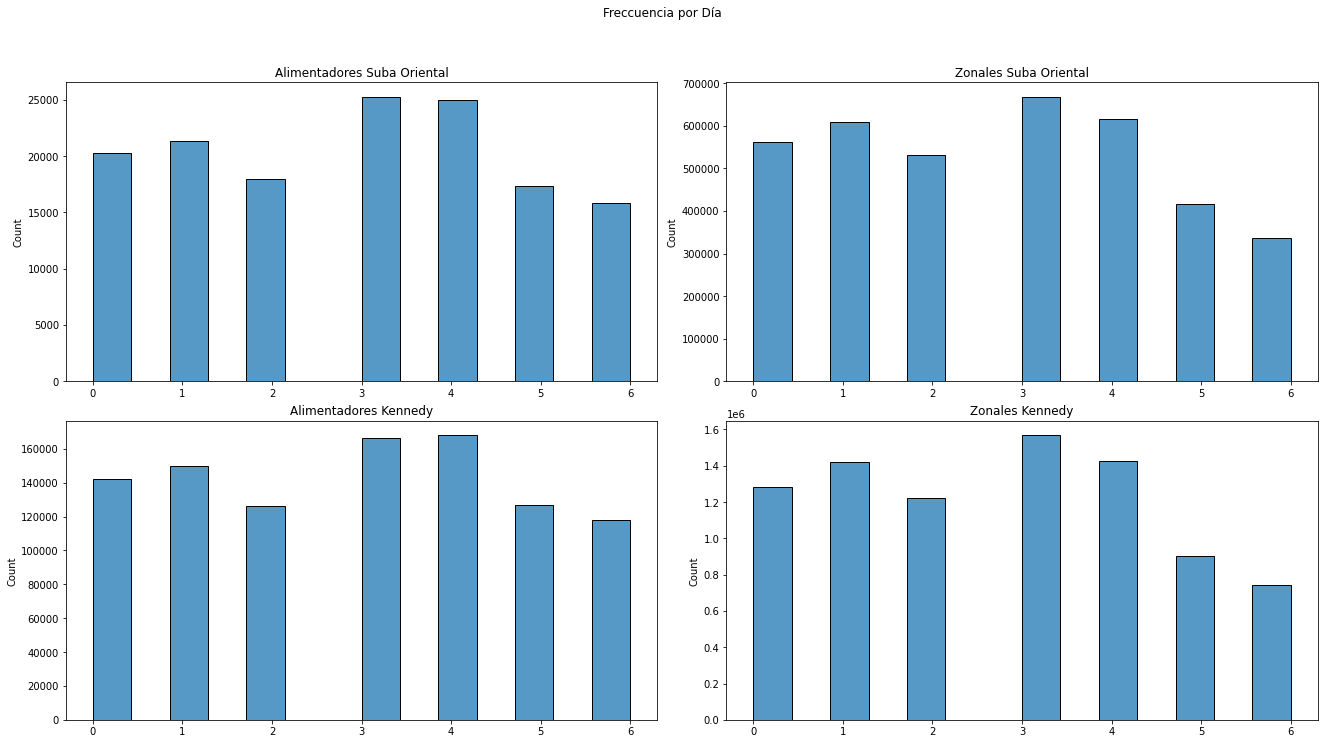

In [ ]:
fig, ax = plt.subplots(2,2)
sns.histplot(dates_al_suba['Dia'].values, ax=ax[0,0], bins=14)
sns.histplot(dates_zn_suba['Dia'].values, ax=ax[0,1], bins=14)
sns.histplot(dates_zn_ken['Dia'].values, ax=ax[1,1], bins=14)
sns.histplot(dates_al_ken['Dia'].values, ax=ax[1,0], bins=14)
ax[0,0].set_title('Alimentadores Suba Oriental')
ax[0,1].set_title('Zonales Suba Oriental')
ax[1,0].set_title('Alimentadores Kennedy')
ax[1,1].set_title('Zonales Kennedy')
fig.suptitle('Freccuencia por Día')
fig.set_size_inches(18.5, 10.5)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

## Travels data

In [ ]:
travels_al_suba = pd.read_csv('data/Masivo_capital_3_viajes_conductor/Informe Viajes Conductor_Alimentacion_102 Suba Oriental_202104.csv', sep=';')
travels_al_suba

FileNotFoundError: ignored

In [ ]:
travels_al_ken = pd.read_csv('data/Masivo_capital_3_viajes_conductor/Informe Viajes Conductor_Alimentacion_112 Kennedy_202104.csv', sep=';')
travels_al_ken

FileNotFoundError: ignored

In [ ]:
travels_zn_suba = pd.read_csv('data/Masivo_capital_3_viajes_conductor/Informe Viajes Conductor_Zonal_102 Suba Oriental_202104.csv', sep=';')
travels_zn_suba

In [ ]:
travels_zn_ken = pd.read_csv('data/Masivo_capital_3_viajes_conductor/Informe Viajes Conductor_Zonal_112 Kennedy_202104.csv', sep=';')
travels_zn_ken

## Validations data

### Data loading

In [113]:
week = 13 
valid_suba = pd.read_csv('/content/gdrive/MyDrive/data/Masivo_capital_4_validaciones/Reporte de Validaciones_Zonal_102 Suba Oriental_202104_Semana '+str(week)+'.csv',sep=';',encoding='latin-1')
for i in range(1,5):
    valid_suba = pd.concat([valid_suba, pd.read_csv('/content/gdrive/MyDrive/data/Masivo_capital_4_validaciones/Reporte de Validaciones_Zonal_102 Suba Oriental_202104_Semana '+str(week+i)+'.csv',sep=';',encoding='latin-1')])
valid_suba

,Fecha Clearing,Día Trx,Hora Trx,Operador,Ruta Modificada,Linea SAE,Parada,Tipo Vehiculo,Vehiculo,Tipo de Viaje,Linea
0,2021-03-29 00:00:00.0,29/03/2021,3:59:22,102,3811,920,(3156) 212A12CEEE|212A12_Br. Puerta al Llano,(02) Urbano,204154,Transbordo,(920) TC30
1,2021-03-29 00:00:00.0,29/03/2021,3:59:26,102,3811,920,(3156) 212A12CEEE|212A12_Br. Puerta al Llano,(02) Urbano,204154,Transbordo,(920) TC30
2,2021-03-29 00:00:00.0,29/03/2021,3:59:29,102,3811,920,(3156) 212A12CEEE|212A12_Br. Puerta al Llano,(02) Urbano,204154,Transbordo,(920) TC30
3,2021-03-29 00:00:00.0,29/03/2021,3:59:32,102,3811,920,(3156) 212A12CEEE|212A12_Br. Puerta al Llano,(02) Urbano,204154,Transbordo,(920) TC30
4,2021-03-29 00:00:00.0,29/03/2021,3:59:36,102,3811,920,(3156) 212A12CEEE|212A12_Br. Puerta al Llano,(02) Urbano,204154,Transbordo,(920) TC30
...,...,...,...,...,...,...,...,...,...,...,...
536745,2021-05-02 00:00:00.0,26/04/2021,21:47:35,112,3142,779,(19179) 079A12_MC|079A12_Br. San Jos?ur,(02) Urbano,254162,Viaje Inicial,(779) T30A
536746,2021-05-02 00:00:00.0,27/04/2021,22:05:01,112,4009,956,(19171) 021A10_MC|021A10_Sena,(02) Urbano,254162,Transbordo,(956) 738
536747,2021-05-02 00:00:00.0,27/04/2021,22:05:04,112,4009,956,(19171) 021A10_MC|021A10_Sena,(02) Urbano,254162,Transbordo,(956) 738
536748,2021-05-02 00:00:00.0,27/04/2021,22:08:05,112,4009,956,(47067) 102B11_MC|102B11,(02) Urbano,254162,Viaje Inicial,(956) 738


In [131]:
valid_suba['Nodo'].unique()

array(['3156', '36761', '54954', ..., '41710', '3610', '49974'],
      dtype=object)

In [134]:
valid_suba['Nodo'] = valid_suba['Parada'].str.extract('^\(([0-9]+)\)').astype('float')
valid_suba['Linea'] = valid_suba['Linea SAE'].astype('float')
valid_suba

,Fecha Clearing,Día Trx,Hora Trx,Operador,Ruta Modificada,Linea SAE,Parada,Tipo Vehiculo,Vehiculo,Tipo de Viaje,Linea,Nodo
0,2021-03-29 00:00:00.0,29/03/2021,3:59:22,102,3811,920,(3156) 212A12CEEE|212A12_Br. Puerta al Llano,(02) Urbano,204154,Transbordo,920.0,3156.0
1,2021-03-29 00:00:00.0,29/03/2021,3:59:26,102,3811,920,(3156) 212A12CEEE|212A12_Br. Puerta al Llano,(02) Urbano,204154,Transbordo,920.0,3156.0
2,2021-03-29 00:00:00.0,29/03/2021,3:59:29,102,3811,920,(3156) 212A12CEEE|212A12_Br. Puerta al Llano,(02) Urbano,204154,Transbordo,920.0,3156.0
3,2021-03-29 00:00:00.0,29/03/2021,3:59:32,102,3811,920,(3156) 212A12CEEE|212A12_Br. Puerta al Llano,(02) Urbano,204154,Transbordo,920.0,3156.0
4,2021-03-29 00:00:00.0,29/03/2021,3:59:36,102,3811,920,(3156) 212A12CEEE|212A12_Br. Puerta al Llano,(02) Urbano,204154,Transbordo,920.0,3156.0
...,...,...,...,...,...,...,...,...,...,...,...,...
536745,2021-05-02 00:00:00.0,26/04/2021,21:47:35,112,3142,779,(19179) 079A12_MC|079A12_Br. San Jos?ur,(02) Urbano,254162,Viaje Inicial,779.0,19179.0
536746,2021-05-02 00:00:00.0,27/04/2021,22:05:01,112,4009,956,(19171) 021A10_MC|021A10_Sena,(02) Urbano,254162,Transbordo,956.0,19171.0
536747,2021-05-02 00:00:00.0,27/04/2021,22:05:04,112,4009,956,(19171) 021A10_MC|021A10_Sena,(02) Urbano,254162,Transbordo,956.0,19171.0
536748,2021-05-02 00:00:00.0,27/04/2021,22:08:05,112,4009,956,(47067) 102B11_MC|102B11,(02) Urbano,254162,Viaje Inicial,956.0,47067.0


In [ ]:
valid_ken = pd.read_csv('/content/gdrive/MyDrive/data/Masivo_capital_4_validaciones/Reporte de Validaciones_Zonal_112 Kennedy_202104_Semana '+str(week)+'.csv',sep=';',encoding='latin-1')
for i in range(1,5):
    valid_ken = pd.concat([valid_ken, pd.read_csv('/content/gdrive/MyDrive/data/Masivo_capital_4_validaciones/Reporte de Validaciones_Zonal_112 Kennedy_202104_Semana '+str(week+i)+'.csv',sep=';',encoding='latin-1')])
valid_ken

In [ ]:
validaciones = valid_suba.append(valid_ken)
validaciones.to_csv('validaciones.csv', encoding = 'utf-8-sig')

In [ ]:
# copias de datasets originales 

valid_suba_raw=valid_suba.copy()
valid_ken_raw=valid_ken.copy()

### Cleanning and exploration

In [ ]:
# EDA
# info datasets

valid_suba_raw.info()
print('\n')
valid_ken_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1703864 entries, 0 to 536749
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Fecha Clearing   object
 1   Día Trx          object
 2   Hora Trx         object
 3   Operador         int64 
 4   Ruta Modificada  int64 
 5   Linea SAE        int64 
 6   Parada           object
 7   Tipo Vehiculo    object
 8   Vehiculo         int64 
 9   Tipo de Viaje    object
 10  Linea            object
dtypes: int64(4), object(7)
memory usage: 156.0+ MB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3256956 entries, 0 to 208521
Data columns (total 11 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Fecha Clearing   object
 1   Día Trx          object
 2   Hora Trx         object
 3   Operador         int64 
 4   Ruta Modificada  int64 
 5   Linea SAE        int64 
 6   Parada           object
 7   Tipo Vehiculo    object
 8   Vehiculo         int64 
 9   Tipo de Viaje    obje

In [ ]:
# EDA
# cantidad de duplicated values

dup_valid_suba_raw=valid_suba_raw[valid_suba_raw.duplicated(keep=False)]
dup_valid_ken_raw=valid_ken_raw[valid_ken_raw.duplicated(keep=False)]

print(dup_valid_suba_raw.info())
print(dup_valid_ken_raw.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 53250 to 507752
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Fecha Clearing   96 non-null     object
 1   Día Trx          96 non-null     object
 2   Hora Trx         96 non-null     object
 3   Operador         96 non-null     int64 
 4   Ruta Modificada  96 non-null     int64 
 5   Linea SAE        96 non-null     int64 
 6   Parada           96 non-null     object
 7   Tipo Vehiculo    96 non-null     object
 8   Vehiculo         96 non-null     int64 
 9   Tipo de Viaje    96 non-null     object
 10  Linea            96 non-null     object
dtypes: int64(4), object(7)
memory usage: 9.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 31811 to 172827
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Fecha Clearing   268 non-null    object
 1

In [ ]:
# EDA
# calcula los valores únicos de las columnas seleccionadas como argumentos
def unique_vals (df, *args):

    for col in args:    
        print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
        print(valid_suba_raw[col].value_counts().to_frame().reset_index().sort_values(by=['index']))
        print('\n')
        print(valid_suba_raw[col].unique().shape)
        print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
        print('\n')

# valores únicos suba oriental
unique_vals (valid_suba_raw, 'Fecha Clearing', 'Día Trx', 'Hora Trx', 'Operador', 'Ruta Modificada', 'Linea SAE', 'Parada', 'Tipo Vehiculo', 'Vehiculo', 'Tipo de Viaje', 'Linea')

# valores únicos kennedy
unique_vals (valid_ken_raw, 'Fecha Clearing', 'Día Trx', 'Hora Trx', 'Operador', 'Ruta Modificada', 'Linea SAE', 'Parada', 'Tipo Vehiculo', 'Vehiculo', 'Tipo de Viaje', 'Linea')

-----------------------------------------------------------------------------------------------------------------------------------------------------
                    index  Fecha Clearing
17  2021-03-29 00:00:00.0           53017
16  2021-03-30 00:00:00.0           55099
18  2021-03-31 00:00:00.0           52599
29  2021-04-01 00:00:00.0           20235
31  2021-04-02 00:00:00.0           16360
..                    ...             ...
0   2021-04-27 00:00:00.0          141714
12  2021-04-28 00:00:00.0           55595
2   2021-04-29 00:00:00.0          122706
23  2021-05-01 00:00:00.0           36371
19  2021-05-02 00:00:00.0           40802

[34 rows x 2 columns]


(34,)
-----------------------------------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------------------------------
         inde

### Suba Oriental

#### Casting 

In [ ]:
# DC, T, FE
# suba oriental

# se renombran las columnas por consistencia de los datos, todos los nombres son el minúsculas con '_' como separador (consistency)
valid_suba_newcols = {"Fecha Clearing":"fecha_clearing",
                "Día Trx":"dia_trx",
                "Hora Trx":"hora_trx",
                "Operador":"operador",
                "Ruta Modificada":"ruta_modificada",
                "Linea SAE":"linea_sae",
                "Parada":"parada",
                "Tipo Vehiculo":"tipo_vehiculo",
                "Vehiculo":"vehiculo",
                "Tipo de Viaje":"tipo_viaje",
                "Linea":"id_linea"
               }
valid_suba_raw = valid_suba_raw.rename(columns=valid_suba_newcols)

# se crea un id para cada observación (consistency)
shape_df_suba=valid_suba_raw.shape
valid_suba_raw['val_id']=np.array([i for i in range(1,shape_df_suba[0]+1)])

# se crea una nueva columna llamada linea, que solo muestra el nombre de la ruta sin id
valid_suba_raw['linea']=valid_suba_raw['id_linea'].str.split(' ')
def split_linea(value):
    return value[-1].strip()
valid_suba_raw['linea']=valid_suba_raw['linea'].apply(split_linea)

# se crea una función para separar el nombre de la parada del id
def split_parada(value):
    if '|' not in value:
        return value
    else: 
        list_vals=value.split('|')
        return list_vals[-1].strip()
valid_suba_raw['parada']=valid_suba_raw['parada'].apply(split_parada)

# se transforma la característica Hora Trx a datetime y se extrae la hora y el minuto (consistency) 
valid_suba_raw['hora_trx']=pd.to_datetime(valid_suba_raw['hora_trx'], format="%H:%M:%S")
valid_suba_raw['val_minute']=valid_suba_raw['hora_trx'].dt.minute
valid_suba_raw['val_hour']=valid_suba_raw['hora_trx'].dt.hour

# se obtiene el día de la fecha, el día de la semana y se transforma a variable categórica (consistency and data augmentation)
valid_suba_raw['val_date']=valid_suba_raw['fecha_clearing'].dt.day
valid_suba_raw['val_day_week']=valid_suba_raw['fecha_clearing'].dt.dayofweek
valid_suba_raw['val_day_name']=valid_suba_raw['fecha_clearing'].dt.day_name()
cat_day_name = pd.api.types.CategoricalDtype(categories=['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
valid_suba_raw['val_day_name'] = valid_suba_raw['val_day_name'].astype(cat_day_name) 

# se obtiene el mes de la fecha (data augmentation)
valid_suba_raw['val_month']=valid_suba_raw['fecha_clearing'].dt.month

# se obtiene el año de la fecha (data augmentation)
valid_suba_raw['val_year']=valid_suba_raw['fecha_clearing'].dt.year

valid_suba_raw['operador']=valid_suba_raw['operador'].astype("category")
valid_suba_raw['ruta_modificada']=valid_suba_raw['ruta_modificada'].astype("category")
valid_suba_raw['linea_sae']=valid_suba_raw['linea_sae'].astype("category")
#valid_suba_raw['parada']=valid_suba_raw['parada'].astype("category")
valid_suba_raw['tipo_vehiculo']=valid_suba_raw['tipo_vehiculo'].astype("category")
valid_suba_raw['vehiculo']=valid_suba_raw['vehiculo'].astype("category")
valid_suba_raw['tipo_viaje']=valid_suba_raw['tipo_viaje'].astype("category")
valid_suba_raw['id_linea']=valid_suba_raw['id_linea'].astype("category")
valid_suba_raw['val_id']=valid_suba_raw['val_id'].astype("category")
#valid_suba_raw['linea']=valid_suba_raw['linea'].astype("category")
valid_suba_raw['val_minute']=valid_suba_raw['val_minute'].astype("category")
valid_suba_raw['val_hour']=valid_suba_raw['val_hour'].astype("category")
valid_suba_raw['val_date']=valid_suba_raw['val_date'].astype("category")
valid_suba_raw['val_day_week']=valid_suba_raw['val_day_week'].astype("category")
valid_suba_raw['val_day_name']=valid_suba_raw['val_day_name'].astype("category")
valid_suba_raw['val_month']=valid_suba_raw['val_month'].astype("category")
valid_suba_raw['val_year']=valid_suba_raw['val_year'].astype("category")

# se define el mes para visualizar
valid_suba_raw=valid_suba_raw[valid_suba_raw['val_month']==4]

AttributeError: ignored

#### Univariate analysis

In [ ]:
# EDA
# suba oriental

bar_hour_suba=valid_suba_raw.groupby(['val_hour'])['val_id'].count()
bar_hour_suba=bar_hour_suba.reset_index()

sns.barplot(data=bar_hour_suba, x='val_hour', y='val_id', palette="pastel")

In [ ]:
# EDA
# suba oriental

bar_weekday_suba=valid_suba_raw.groupby(['val_day_name'])['val_id'].count()
bar_weekday_suba=bar_weekday_suba.reset_index()

sns.barplot(data=bar_weekday_suba, x='val_day_name', y='val_id', palette="pastel")
plt.xticks(rotation=90)

In [ ]:
# EDA
# suba oriental

bar_day_suba=valid_suba_raw.groupby(['val_date'])['val_id'].count()
bar_day_suba=bar_day_suba.reset_index()

sns.barplot(data=bar_day_suba, x='val_date', y='val_id', palette="pastel")

In [ ]:
# EDA
# suba oriental

valid_suba_parada=valid_suba_raw.groupby(['parada'])['val_id'].count()
valid_suba_parada=valid_suba_parada.reset_index().sort_values(by='val_id', ascending=False).head(30)

f0, ax0 = plt.subplots(figsize=(15, 6))
g0=sns.barplot(data=valid_suba_parada, x='parada', y='val_id', palette="pastel", ax=ax0)
plt.xticks(rotation=90)

In [ ]:
# EDA
# suba oriental

valid_suba_linea=valid_suba_raw.groupby(['linea'])['val_id'].count()
valid_suba_linea=valid_suba_linea.reset_index().sort_values(by='val_id', ascending=False)

f1, ax1 = plt.subplots(figsize=(17, 6))
g1=sns.barplot(data=valid_suba_linea, x='linea', y='val_id', palette="pastel", ax=ax1)
plt.xticks(rotation=90)

In [ ]:
# EDA
# suba oriental

valid_suba_hmn_linea=pd.crosstab(index=valid_suba_raw["linea"], columns=valid_suba_raw["val_hour"], normalize="index")*100

f2, ax2 = plt.subplots(figsize=(20, 20))
g2=sns.heatmap(valid_suba_hmn_linea, cmap="Reds", ax=ax2, annot=True, fmt=".2f")

In [ ]:
# EDA
# suba oriental

valid_suba_hmn_parada_hour=pd.crosstab(index=valid_suba_raw["linea"], columns=valid_suba_raw["val_hour"], normalize="columns")*100

f3, ax3 = plt.subplots(figsize=(20, 20))
g3=sns.heatmap(valid_suba_hmn_parada_hour, cmap="Reds", ax=ax3, annot=True, fmt=".2f")

In [ ]:
# EDA
# suba oriental

valid_suba_hm_hourday=pd.crosstab(index=valid_suba_raw["val_day_name"], columns=valid_suba_raw["val_hour"])

f4, ax4 = plt.subplots(figsize=(20, 8))
g4=sns.heatmap(valid_suba_hm_hourday, cmap="Reds" ,ax=ax4, annot=True, fmt="d")

In [ ]:
# EDA
# suba oriental

valid_suba_hmn_dayhour=pd.crosstab(index=valid_suba_raw["val_day_name"], columns=valid_suba_raw["val_hour"], normalize='index')

f5, ax5 = plt.subplots(figsize=(15, 8))
g5=sns.heatmap(valid_suba_hmn_dayhour, cmap="Reds" ,ax=ax5, annot=True, fmt=".2f")

In [ ]:
# EDA
# suba oriental

valid_suba_hmn_hourday=pd.crosstab(index=valid_suba_raw["val_day_name"], columns=valid_suba_raw["val_hour"], normalize='columns')

f6, ax6 = plt.subplots(figsize=(15, 8))
g6=sns.heatmap(valid_suba_hmn_hourday, cmap="Reds" ,ax=ax6, annot=True, fmt=".2f")

In [ ]:
# EDA
# suba oriental

# promedio mensual de validaciones por hora para distintas paradas

unique_values_paradas=valid_suba_parada['parada'].unique()
valid_suba_pltmeanparada=valid_suba_raw[valid_suba_raw['val_month']==4].groupby(['parada', 'val_hour', 'fecha_clearing'])['val_id'].count()
valid_suba_pltmeanparada=valid_suba_pltmeanparada.reset_index()
valid_suba_pltmeanparada=valid_suba_pltmeanparada[valid_suba_pltmeanparada['parada'].isin(unique_values_paradas)]
valid_suba_pltmeanparada=valid_suba_pltmeanparada.groupby(['parada', 'val_hour'])['val_id'].mean().reset_index()

fig7 = px.line(valid_suba_pltmeanparada, x="val_hour", y="val_id", color='parada')
fig7.show()

In [ ]:
# EDA
# suba oriental

# promedio mensual de validaciones por hora para distintas lineas

valid_suba_pltmeanlinea=valid_suba_raw[valid_suba_raw['val_month']==4].groupby(['linea', 'val_hour', 'fecha_clearing'])['val_id'].count()
valid_suba_pltmeanlinea=valid_suba_pltmeanlinea.reset_index()
valid_suba_pltmeanlinea=valid_suba_pltmeanlinea.groupby(['linea', 'val_hour'])['val_id'].mean().reset_index()

fig7 = px.line(valid_suba_pltmeanlinea, x="val_hour", y="val_id", color='linea')
fig7.show()

In [ ]:
# EDA
# suba oriental

# validaciones totales por día para distintas lineas

valid_suba_pltlinead=valid_suba_raw[valid_suba_raw['val_month']==4].groupby(['fecha_clearing', 'linea'])['val_id'].count()
valid_suba_pltlinead=valid_suba_pltlinead.reset_index()

fig8 = px.line(valid_suba_pltlinead, x="fecha_clearing", y="val_id", color='linea')
fig8.show()

In [ ]:
# EDA
# suba oriental

# validaciones totales por hora para distintas lineas

valid_suba_pltlineah=valid_suba_raw[valid_suba_raw['val_month']==4].groupby(['val_hour', 'linea'])['val_id'].count()
valid_suba_pltlineah=valid_suba_pltlineah.reset_index()

fig9 = px.line(valid_suba_pltlineah, x="val_hour", y="val_id", color='linea')
fig9.show()

### Kennedy

#### Casting

In [ ]:
# DC, T, FE
# kennedy

# se renombran las columnas por consistencia de los datos, todos los nombres son el minúsculas con '_' como separador (consistency)
valid_ken_newcols = {"Fecha Clearing":"fecha_clearing",
                "Día Trx":"dia_trx",
                "Hora Trx":"hora_trx",
                "Operador":"operador",
                "Ruta Modificada":"ruta_modificada",
                "Linea SAE":"linea_sae",
                "Parada":"parada",
                "Tipo Vehiculo":"tipo_vehiculo",
                "Vehiculo":"vehiculo",
                "Tipo de Viaje":"tipo_viaje",
                "Linea":"id_linea"
               }
valid_ken_raw = valid_ken_raw.rename(columns=valid_ken_newcols)

# se crea un id para cada observación (consistency)
shape_df_suba=valid_ken_raw.shape
valid_ken_raw['val_id']=np.array([i for i in range(1,shape_df_suba[0]+1)])

# se crea una nueva columna llamada linea, que solo muestra el nombre de la ruta sin id
valid_ken_raw['linea']=valid_ken_raw['id_linea'].str.split(' ')
def split_linea(value):
    return value[-1].strip()
valid_ken_raw['linea']=valid_ken_raw['linea'].apply(split_linea)

# se crea una función para separar el nombre de la parada del id
def split_parada(value):
    if '|' not in value:
        return value
    else: 
        list_vals=value.split('|')
        return list_vals[-1].strip()
valid_ken_raw['parada']=valid_ken_raw['parada'].apply(split_parada)

# se transforma la característica Hora Trx a datetime y se extrae la hora y el minuto (consistency) 
valid_ken_raw['hora_trx']=pd.to_datetime(valid_ken_raw['hora_trx'], format="%H:%M:%S")
valid_ken_raw['val_minute']=valid_ken_raw['hora_trx'].dt.minute
valid_ken_raw['val_hour']=valid_ken_raw['hora_trx'].dt.hour

# se obtiene el día de la fecha, el día de la semana y se transforma a variable categórica (consistency and data augmentation)
valid_ken_raw['val_date']=valid_ken_raw['fecha_clearing'].dt.day
valid_ken_raw['val_day_week']=valid_ken_raw['fecha_clearing'].dt.dayofweek
valid_ken_raw['val_day_name']=valid_ken_raw['fecha_clearing'].dt.day_name()
cat_day_name = pd.api.types.CategoricalDtype(categories=['Monday','Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
valid_ken_raw['val_day_name'] = valid_ken_raw['val_day_name'].astype(cat_day_name) 

# se obtiene el mes de la fecha (data augmentation)
valid_ken_raw['val_month']=valid_ken_raw['fecha_clearing'].dt.month

# se obtiene el año de la fecha (data augmentation)
valid_ken_raw['val_year']=valid_ken_raw['fecha_clearing'].dt.year

valid_ken_raw['operador']=valid_ken_raw['operador'].astype("category")
valid_ken_raw['ruta_modificada']=valid_ken_raw['ruta_modificada'].astype("category")
valid_ken_raw['linea_sae']=valid_ken_raw['linea_sae'].astype("category")
#valid_ken_raw['parada']=valid_ken_raw['parada'].astype("category")
valid_ken_raw['tipo_vehiculo']=valid_ken_raw['tipo_vehiculo'].astype("category")
valid_ken_raw['vehiculo']=valid_ken_raw['vehiculo'].astype("category")
valid_ken_raw['tipo_viaje']=valid_ken_raw['tipo_viaje'].astype("category")
valid_ken_raw['id_linea']=valid_ken_raw['id_linea'].astype("category")
valid_ken_raw['val_id']=valid_ken_raw['val_id'].astype("category")
#valid_ken_raw['linea']=valid_ken_raw['linea'].astype("category")
valid_ken_raw['val_minute']=valid_ken_raw['val_minute'].astype("category")
valid_ken_raw['val_hour']=valid_ken_raw['val_hour'].astype("category")
valid_ken_raw['val_date']=valid_ken_raw['val_date'].astype("category")
valid_ken_raw['val_day_week']=valid_ken_raw['val_day_week'].astype("category")
valid_ken_raw['val_day_name']=valid_ken_raw['val_day_name'].astype("category")
valid_ken_raw['val_month']=valid_ken_raw['val_month'].astype("category")
valid_ken_raw['val_year']=valid_ken_raw['val_year'].astype("category")

# se define el mes para visualizar
valid_ken_raw=valid_ken_raw[valid_ken_raw['val_month']==4]

#### Univariate analysis

In [ ]:
# EDA
# kennedy

bar_hour_ken=valid_ken_raw.groupby(['val_hour'])['val_id'].count()
bar_hour_ken=bar_hour_ken.reset_index()

sns.barplot(data=bar_hour_ken, x='val_hour', y='val_id', palette="pastel")

In [ ]:
# EDA
# kennedy

bar_weekday_ken=valid_ken_raw.groupby(['val_day_name'])['val_id'].count()
bar_weekday_ken=bar_weekday_ken.reset_index()

sns.barplot(data=bar_weekday_ken, x='val_day_name', y='val_id', palette="pastel")
plt.xticks(rotation=90)

In [ ]:
# EDA
# kennedy

bar_day_ken=valid_ken_raw.groupby(['val_date'])['val_id'].count()
bar_day_ken=bar_day_ken.reset_index()

sns.barplot(data=bar_day_ken, x='val_date', y='val_id', palette="pastel")

In [ ]:
# EDA
# kennedy

valid_ken_parada=valid_ken_raw.groupby(['parada'])['val_id'].count()
valid_ken_parada=valid_ken_parada.reset_index().sort_values(by='val_id', ascending=False).head(30)

f10, ax10 = plt.subplots(figsize=(15, 6))
g0=sns.barplot(data=valid_ken_parada, x='parada', y='val_id', palette="pastel", ax=ax10)
plt.xticks(rotation=90)

In [ ]:
# EDA
# kennedy

valid_ken_linea=valid_ken_raw.groupby(['linea'])['val_id'].count()
valid_ken_linea=valid_ken_linea.reset_index().sort_values(by='val_id', ascending=False)

f11, ax11 = plt.subplots(figsize=(17, 6))
g1=sns.barplot(data=valid_ken_linea, x='linea', y='val_id', palette="pastel", ax=ax11)
plt.xticks(rotation=90)

In [ ]:
# EDA
# kennedy

valid_ken_hmn_linea=pd.crosstab(index=valid_ken_raw["linea"], columns=valid_ken_raw["val_hour"], normalize="index")*100

f12, ax12 = plt.subplots(figsize=(20, 20))
g2=sns.heatmap(valid_ken_hmn_linea, cmap="Reds", ax=ax12, annot=True, fmt=".2f")

In [ ]:
# EDA
# kennedy

valid_ken_hmn_parada_hour=pd.crosstab(index=valid_ken_raw["linea"], columns=valid_ken_raw["val_hour"], normalize="columns")*100

f13, ax13 = plt.subplots(figsize=(20, 20))
g3=sns.heatmap(valid_ken_hmn_parada_hour, cmap="Reds", ax=ax13, annot=True, fmt=".2f")

In [ ]:
# EDA
# kennedy

valid_ken_hm_hourday=pd.crosstab(index=valid_ken_raw["val_day_name"], columns=valid_ken_raw["val_hour"])

f14, ax14 = plt.subplots(figsize=(20, 8))
g4=sns.heatmap(valid_ken_hm_hourday, cmap="Reds" ,ax=ax14, annot=True, fmt="d")

In [ ]:
# EDA
# kennedy

valid_ken_hmn_dayhour=pd.crosstab(index=valid_ken_raw["val_day_name"], columns=valid_ken_raw["val_hour"], normalize='index')

f15, ax15 = plt.subplots(figsize=(15, 8))
g5=sns.heatmap(valid_ken_hmn_dayhour, cmap="Reds" ,ax=ax15, annot=True, fmt=".2f")

In [ ]:
# EDA
# kennedy

valid_ken_hmn_hourday=pd.crosstab(index=valid_ken_raw["val_day_name"], columns=valid_ken_raw["val_hour"], normalize='columns')

f16, ax16 = plt.subplots(figsize=(15, 8))
g6=sns.heatmap(valid_ken_hmn_hourday, cmap="Reds" ,ax=ax16, annot=True, fmt=".2f")

In [ ]:
# EDA
# kennedy

# promedio mensual de validaciones por hora para distintas paradas

unique_values_paradas_ken=valid_ken_parada['parada'].unique()
valid_ken_pltmeanparada=valid_ken_raw[valid_ken_raw['val_month']==4].groupby(['parada', 'val_hour', 'fecha_clearing'])['val_id'].count()
valid_ken_pltmeanparada=valid_ken_pltmeanparada.reset_index()
valid_ken_pltmeanparada=valid_ken_pltmeanparada[valid_ken_pltmeanparada['parada'].isin(unique_values_paradas_ken)]
valid_ken_pltmeanparada=valid_ken_pltmeanparada.groupby(['parada', 'val_hour'])['val_id'].mean().reset_index()

fig7 = px.line(valid_ken_pltmeanparada, x="val_hour", y="val_id", color='parada')
fig7.show()

In [ ]:
# EDA
# kennedy

# promedio mensual de validaciones por hora para distintas lineas

valid_ken_pltmeanlinea=valid_ken_raw[valid_ken_raw['val_month']==4].groupby(['linea', 'val_hour', 'fecha_clearing'])['val_id'].count()
valid_ken_pltmeanlinea=valid_ken_pltmeanlinea.reset_index()
valid_ken_pltmeanlinea=valid_ken_pltmeanlinea.groupby(['linea', 'val_hour'])['val_id'].mean().reset_index()

fig7 = px.line(valid_ken_pltmeanlinea, x="val_hour", y="val_id", color='linea')
fig7.show()

In [ ]:
# EDA
# kennedy

# validaciones totales por día para distintas lineas

valid_ken_pltlinead=valid_ken_raw[valid_ken_raw['val_month']==4].groupby(['fecha_clearing', 'linea'])['val_id'].count()
valid_ken_pltlinead=valid_ken_pltlinead.reset_index()

fig8 = px.line(valid_ken_pltlinead, x="fecha_clearing", y="val_id", color='linea')
fig8.show()

In [ ]:
# EDA
# kennedy

# validaciones totales por hora para distintas lineas

valid_ken_pltlineah=valid_ken_raw[valid_ken_raw['val_month']==4].groupby(['val_hour', 'linea'])['val_id'].count()
valid_ken_pltlineah=valid_ken_pltlineah.reset_index()

fig9 = px.line(valid_ken_pltlineah, x="val_hour", y="val_id", color='linea')
fig9.show()

## Operator programming data

### Data loading

In [ ]:
operator_data = pd.read_csv( '/content/gdrive/MyDrive/data/Masivo_capital_5_programacion/Reporte Progrmacion de Operadores_202104.csv',sep=';', encoding='latin-1')
operator_data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (7,15,20) have mixed types.Specify dtype option on import or set low_memory=False.



,Fecha,Compañía,Asignación,Código de conductor,Conductor,Amplitud del servicio,Tiempo de producción,Distancia de producción (m),Parte de trabajo,Tipo de tarea,Desde,Hasta,Hora inicio,Hora fin,Duración,Distancia (m),Servicio vehículo,Unnamed: 17,Servicio Base,Tipo de vehículo,Línea,Unnamed: 21,Ruta,Unnamed: 23,Vehículo,Viajes,Trayecto
0,1/04/2021,Masivo Capital Alimentadores KE,DESC,250003,DEIVY STEAK ZULUAGA QUINTERO,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/04/2021,Masivo Capital Alimentadores KE,DESC,250047,ALVARO ENRIQUE HERRERA HERRERA,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/04/2021,Masivo Capital Alimentadores KE,DESC,250056,FLEDERID SANCHEZ MORALES,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/04/2021,Masivo Capital Alimentadores KE,DISPOPM_Brasil,250060,JOSE CAMPO ELIAS CUESTA MORALES,10:00:00,8:00:00,NaN,1,Disponible Conducción,Patio_Brasil_1,Patio_Brasil_1,14:00:00,24:00:00,10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/04/2021,Masivo Capital Alimentadores KE,KE107171,250062,JUAN CARLOS MELO MORALES,10:35:00,9:35:00,94214,1,Relevo,DESCARGUE_Banderas-2,DESCARGUE_Banderas-2,9:51:15,9:54:15,0:03:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735137,30/04/2021,MC_Usme_Alim,KE106025,258011,CARLOS ANDRES RODRIGUEZ PINILLA,7:10:00,7:10:00,127052,1,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,8:05:30,8:55:30,0:50:00,17436,SO1090007,NaN,NaN,PADRON,347,NaN,1824,NaN,7.0,6.0,1391.0
735138,30/04/2021,MC_Usme_Alim,KE106025,258011,CARLOS ANDRES RODRIGUEZ PINILLA,7:10:00,7:10:00,127052,1,STANDBY,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,8:55:30,8:59:00,0:03:30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735139,30/04/2021,MC_Usme_Alim,KE106025,258011,CARLOS ANDRES RODRIGUEZ PINILLA,7:10:00,7:10:00,127052,1,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,8:59:00,9:50:00,0:51:00,17436,SO1090007,NaN,NaN,PADRON,347,NaN,1824,NaN,7.0,7.0,1391.0
735140,30/04/2021,MC_Usme_Alim,KE106025,258011,CARLOS ANDRES RODRIGUEZ PINILLA,7:10:00,7:10:00,127052,1,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,9:50:00,10:44:00,0:54:00,17436,SO1090007,NaN,NaN,PADRON,347,NaN,1824,NaN,7.0,8.0,1391.0


In [ ]:
operator_data.dtypes

Fecha                           object
Compañía                        object
Asignación                      object
Código de conductor              int64
Conductor                       object
Amplitud del servicio           object
Tiempo de producción            object
Distancia de producción (m)     object
Parte de trabajo                 int64
Tipo de tarea                   object
Desde                           object
Hasta                           object
Hora inicio                     object
Hora fin                        object
Duración                        object
Distancia (m)                   object
Servicio vehículo               object
Unnamed: 17                    float64
Servicio Base                  float64
Tipo de vehículo                object
Línea                           object
Unnamed: 21                    float64
Ruta                            object
Unnamed: 23                    float64
Vehículo                       float64
Viajes                   

In [ ]:
time = pd.DatetimeIndex(operator_data['Amplitud del servicio'])
operator_data['Amplitud del servicio'] = time.hour*60 + time.minute

In [ ]:
time2 = pd.DatetimeIndex(operator_data['Tiempo de producción'])
operator_data['Tiempo de producción'] = time2.hour*60 + time2.minute

In [ ]:
operator_data['Distancia de producción (m)'].isna().sum()

### Cleanning

In [ ]:
operator_data.columns = operator_data.columns.astype(str).str.strip()

#### Dropping columns

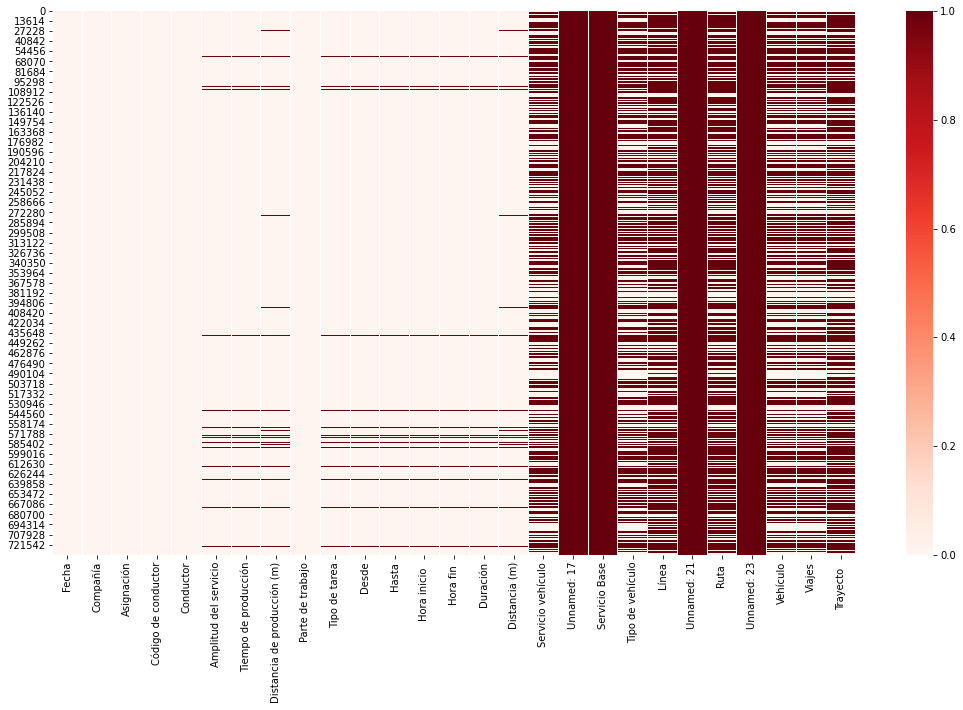

In [ ]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(operator_data.isna(), cmap='Reds',ax=ax)

we recognized different columns without values or any significant information

Tiempo de producción, amplitud del servicio, Tipo de tarea, Desde, Hasta, Hora inicio, Hora fin y Duración tienen la misma cantida de NaNs y en las mismas filas. No se encuentran en un total de 16997 filas.

No hay ninguna fila que contenga Distancia que no contenga Distancia de producción

La columna compañía tiene el identificador de Masivo Capital o MC que puede removerse.

Las columnas amplitud de servicio y tiempo de producción podrían convertirse a minutos para poder realizar operaciones de forma más sencilla con éstas.

Las filas que contienen múltiples NaN pueden tratarse de registros que se programaron pero no se realizaron. Esto podría preguntarse más adelante.

Hay algunos NaN que pueden inferirse dado que tienen campos iguales a otros registros, en tiempos sucesivos. En los otros casos habrá que realizar un análisis profundo y probablemente interpolar o inputar un valor sugestivo.
Este punto queda pendiente.


In [ ]:
operator_data = operator_data.drop(['Unnamed: 17', 'Servicio Base', 'Unnamed: 21','Unnamed: 23'], axis=1)
operator_data

,Fecha,Compañía,Asignación,Código de conductor,Conductor,Amplitud del servicio,Tiempo de producción,Distancia de producción (m),Parte de trabajo,Tipo de tarea,Desde,Hasta,Hora inicio,Hora fin,Duración,Distancia (m),Servicio vehículo,Tipo de vehículo,Línea,Ruta,Vehículo,Viajes,Trayecto
0,1/04/2021,Masivo Capital Alimentadores KE,DESC,250003,DEIVY STEAK ZULUAGA QUINTERO,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/04/2021,Masivo Capital Alimentadores KE,DESC,250047,ALVARO ENRIQUE HERRERA HERRERA,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/04/2021,Masivo Capital Alimentadores KE,DESC,250056,FLEDERID SANCHEZ MORALES,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/04/2021,Masivo Capital Alimentadores KE,DISPOPM_Brasil,250060,JOSE CAMPO ELIAS CUESTA MORALES,10:00:00,8:00:00,NaN,1,Disponible Conducción,Patio_Brasil_1,Patio_Brasil_1,14:00:00,24:00:00,10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/04/2021,Masivo Capital Alimentadores KE,KE107171,250062,JUAN CARLOS MELO MORALES,10:35:00,9:35:00,94214,1,Relevo,DESCARGUE_Banderas-2,DESCARGUE_Banderas-2,9:51:15,9:54:15,0:03:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735137,30/04/2021,MC_Usme_Alim,KE106025,258011,CARLOS ANDRES RODRIGUEZ PINILLA,7:10:00,7:10:00,127052,1,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,8:05:30,8:55:30,0:50:00,17436,SO1090007,PADRON,347,1824,7.0,6.0,1391.0
735138,30/04/2021,MC_Usme_Alim,KE106025,258011,CARLOS ANDRES RODRIGUEZ PINILLA,7:10:00,7:10:00,127052,1,STANDBY,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,8:55:30,8:59:00,0:03:30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735139,30/04/2021,MC_Usme_Alim,KE106025,258011,CARLOS ANDRES RODRIGUEZ PINILLA,7:10:00,7:10:00,127052,1,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,8:59:00,9:50:00,0:51:00,17436,SO1090007,PADRON,347,1824,7.0,7.0,1391.0
735140,30/04/2021,MC_Usme_Alim,KE106025,258011,CARLOS ANDRES RODRIGUEZ PINILLA,7:10:00,7:10:00,127052,1,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,9:50:00,10:44:00,0:54:00,17436,SO1090007,PADRON,347,1824,7.0,8.0,1391.0


#### Casting

###### Time and Dates

In [ ]:
operator_data['Fecha'] = pd.to_datetime(operator_data['Fecha'], dayfirst=True)
operator_data['Amplitud del servicio'] = pd.to_datetime(operator_data['Amplitud del servicio'])
operator_data['Tiempo de producción'] = pd.to_datetime(operator_data['Tiempo de producción'])
operator_data['Duración'] = pd.to_datetime(operator_data['Duración'])

In [ ]:
operator_data['Hora inicio'] = operator_data['Hora inicio'].replace(to_replace=r'(^24)', value='00', regex=True)
operator_data['Hora inicio'] = operator_data['Hora inicio'].replace(to_replace=r'(^25)', value='01', regex=True)
operator_data['Hora inicio'] = operator_data['Hora inicio'].replace(to_replace=r'(^26)', value='02', regex=True)
operator_data['Hora inicio'] = pd.to_datetime(operator_data['Hora inicio'])

In [ ]:
#Cuenta con valores hasta de 30
for i in range(24,31):
  operator_data['Hora fin'] = operator_data['Hora fin'].replace(to_replace=r'(^'+str(i)+')', value=str(i%24), regex=True)
operator_data['Hora fin'] = pd.to_datetime(operator_data['Hora fin'])

NameError: ignored

##### Categories

In [ ]:
operator_data['Compañía'] = operator_data['Compañía'].astype('category')
operator_data['Asignación'] = operator_data['Asignación'].astype('category')
operator_data['Código de conductor'] = operator_data['Código de conductor'].astype('category')
operator_data['Conductor'] = operator_data['Conductor'].astype('category')
operator_data['Parte de trabajo'] = operator_data['Parte de trabajo'].astype('category')
operator_data['Tipo de tarea'] = operator_data['Tipo de tarea'].astype('category')
operator_data['Tipo de vehículo'] = operator_data['Tipo de vehículo'].astype('category')
operator_data['Línea'] = operator_data['Línea'].astype('category')
operator_data['Ruta'] = operator_data['Ruta'].astype('category')
operator_data['Vehículo'] = operator_data['Vehículo'].astype('category')
operator_data['Viajes'] = operator_data['Viajes'].astype('category')
operator_data['Trayecto'] = operator_data['Trayecto'].astype('category')
operator_data['Servicio vehículo'] = operator_data['Servicio vehículo'].astype('category')

##### Numerical

In [ ]:
operator_data['Distancia de producción (m)'] = operator_data['Distancia de producción (m)'].astype(str).replace(to_replace=r'(,)', value='.', regex=True)
operator_data['Distancia de producción (m)'] = operator_data['Distancia de producción (m)'].astype(float)

In [ ]:
operator_data['Distancia (m)'] = operator_data['Distancia (m)'].astype(str).replace(to_replace=r'(,)', value='.', regex=True)
operator_data['Distancia (m)'] = operator_data['Distancia (m)'].astype(float)

In [ ]:
operator_data

,Fecha,Compañía,Asignación,Código de conductor,Conductor,Amplitud del servicio,Tiempo de producción,Distancia de producción (m),Parte de trabajo,Tipo de tarea,Desde,Hasta,Hora inicio,Hora fin,Duración,Distancia (m),Servicio vehículo,Unnamed: 17,Servicio Base,Tipo de vehículo,Línea,Unnamed: 21,Ruta,Unnamed: 23,Vehículo,Viajes,Trayecto
0,2021-04-01,Masivo Capital Alimentadores KE,DESC,250003,DEIVY STEAK ZULUAGA QUINTERO,NaT,NaT,NaN,1,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-01,Masivo Capital Alimentadores KE,DESC,250047,ALVARO ENRIQUE HERRERA HERRERA,NaT,NaT,NaN,1,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-01,Masivo Capital Alimentadores KE,DESC,250056,FLEDERID SANCHEZ MORALES,NaT,NaT,NaN,1,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-01,Masivo Capital Alimentadores KE,DISPOPM_Brasil,250060,JOSE CAMPO ELIAS CUESTA MORALES,2021-07-18 10:00:00,2021-07-18 08:00:00,NaN,1,Disponible Conducción,Patio_Brasil_1,Patio_Brasil_1,2021-07-18 14:00:00,00:00:00,2021-07-18 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-01,Masivo Capital Alimentadores KE,KE107171,250062,JUAN CARLOS MELO MORALES,2021-07-18 10:35:00,2021-07-18 09:35:00,94214.0,1,Relevo,DESCARGUE_Banderas-2,DESCARGUE_Banderas-2,2021-07-18 09:51:15,9:54:15,2021-07-18 00:03:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735137,2021-04-30,MC_Usme_Alim,KE106025,258011,CARLOS ANDRES RODRIGUEZ PINILLA,2021-07-18 07:10:00,2021-07-18 07:10:00,127052.0,1,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,2021-07-18 08:05:30,8:55:30,2021-07-18 00:50:00,17436.0,SO1090007,NaN,NaN,PADRON,347,NaN,1824,NaN,7.0,6.0,1391.0
735138,2021-04-30,MC_Usme_Alim,KE106025,258011,CARLOS ANDRES RODRIGUEZ PINILLA,2021-07-18 07:10:00,2021-07-18 07:10:00,127052.0,1,STANDBY,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,2021-07-18 08:55:30,8:59:00,2021-07-18 00:03:30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735139,2021-04-30,MC_Usme_Alim,KE106025,258011,CARLOS ANDRES RODRIGUEZ PINILLA,2021-07-18 07:10:00,2021-07-18 07:10:00,127052.0,1,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,2021-07-18 08:59:00,9:50:00,2021-07-18 00:51:00,17436.0,SO1090007,NaN,NaN,PADRON,347,NaN,1824,NaN,7.0,7.0,1391.0
735140,2021-04-30,MC_Usme_Alim,KE106025,258011,CARLOS ANDRES RODRIGUEZ PINILLA,2021-07-18 07:10:00,2021-07-18 07:10:00,127052.0,1,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,3-10_USME_CENTRO_BRT,2021-07-18 09:50:00,10:44:00,2021-07-18 00:54:00,17436.0,SO1090007,NaN,NaN,PADRON,347,NaN,1824,NaN,7.0,8.0,1391.0


In [ ]:
operator_data['Compañía'].unique()

['Masivo Capital Alimentadores KE', 'Masivo Capital Alimentadores SO', 'Masivo Capital Bosa Centro', 'Masivo Capital Brasil 2', 'Masivo Capital Cipres', 'Masivo Capital Maria_Juana', 'Masivo Capital Salitre', 'Masivo Capital San Bernardino', 'Masivo Capital Tierra Buena', 'MC_Usme_Alim']
Categories (10, object): ['Masivo Capital Alimentadores KE', 'Masivo Capital Alimentadores SO',
                          'Masivo Capital Bosa Centro', 'Masivo Capital Brasil 2', ..., 'Masivo Capital Salitre',
                          'Masivo Capital San Bernardino', 'Masivo Capital Tierra Buena', 'MC_Usme_Alim']

Los valores de Distancia de producción y Distancia parecen estar relacionados. Una jornada (relacionada a Distancia de producción) puede estar compuesta por múltiples tareas, cada una asociada al campo Distancia. Podría probarse si la sumatoria de distancias para una misma jornada es igual a la distancia de producción.



In [ ]:
operator_data.to_csv('programación_operadores.csv', encoding='utf-8-sig')

### Univariate analysis

#### Categories analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


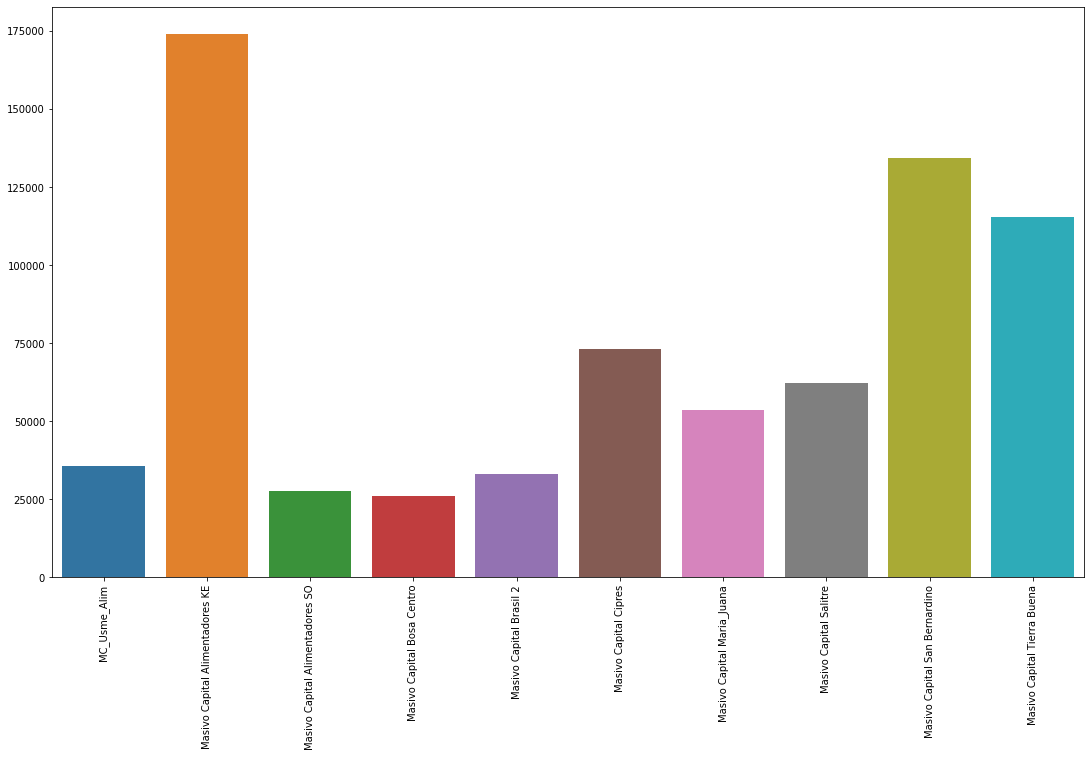

In [ ]:
fig,ax = plt.subplots()
sns.barplot(operator_data['Compañía'].value_counts().index, operator_data['Compañía'].value_counts().values,ax=ax)
ax.tick_params(axis='x', rotation=90)
fig.set_size_inches(18.5,10.5)

#### Numerical analysis

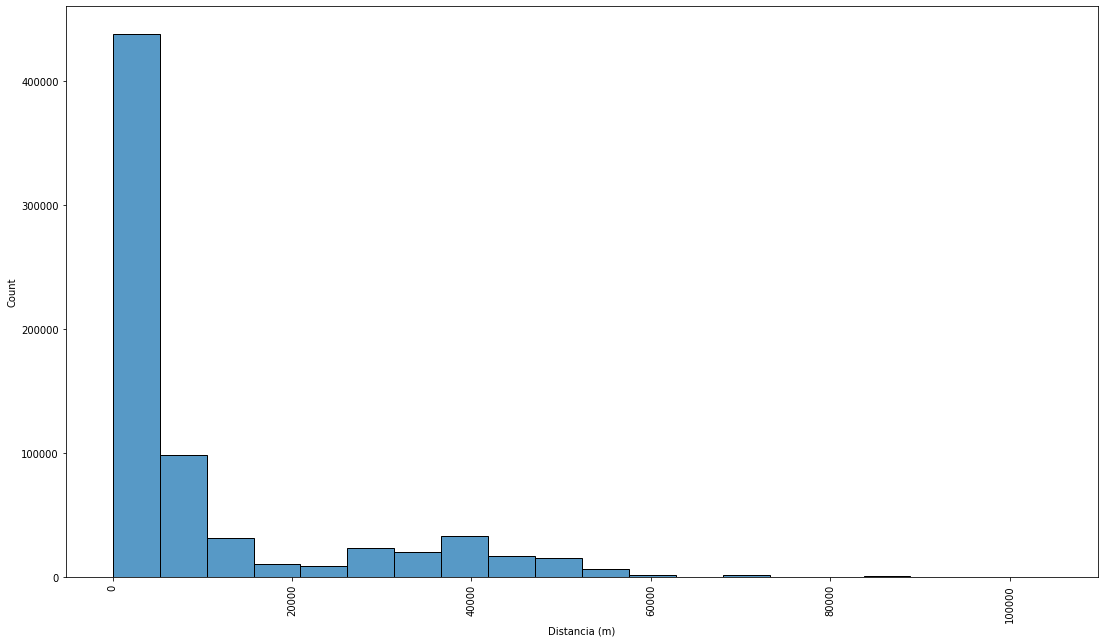

In [ ]:
fig,ax = plt.subplots()
sns.histplot(operator_data['Distancia (m)'], ax=ax, bins=20)
ax.tick_params(axis='x', rotation=90)
fig.set_size_inches(18.5,10.5)

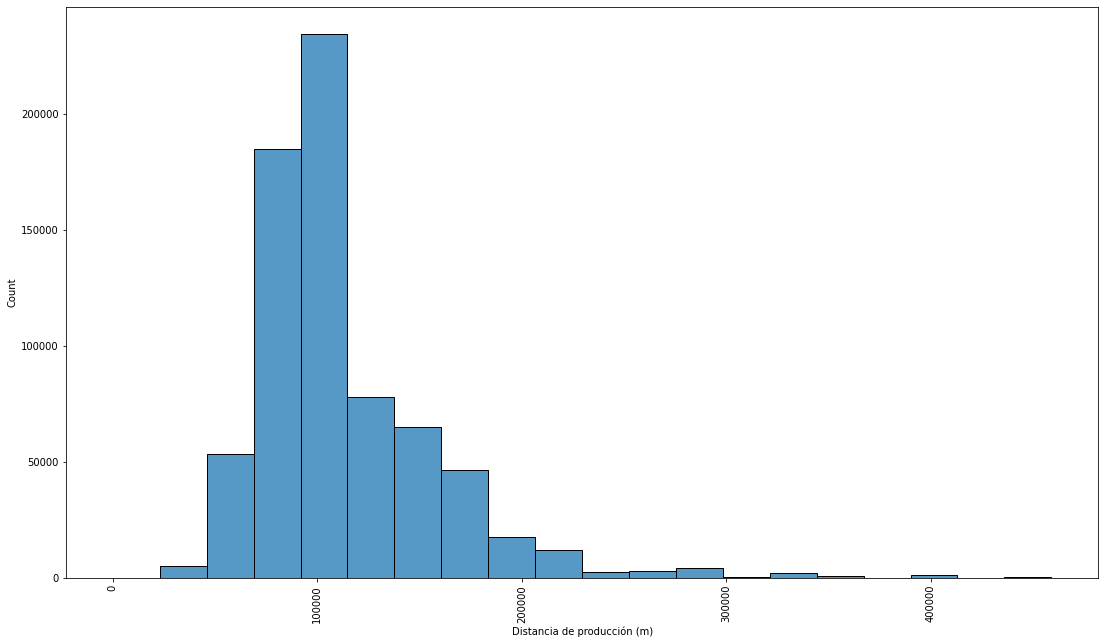

In [ ]:
fig,ax = plt.subplots()
sns.histplot(operator_data['Distancia de producción (m)'], ax=ax, bins=20)
ax.tick_params(axis='x', rotation=90)
fig.set_size_inches(18.5,10.5)

#### Chronological analysis

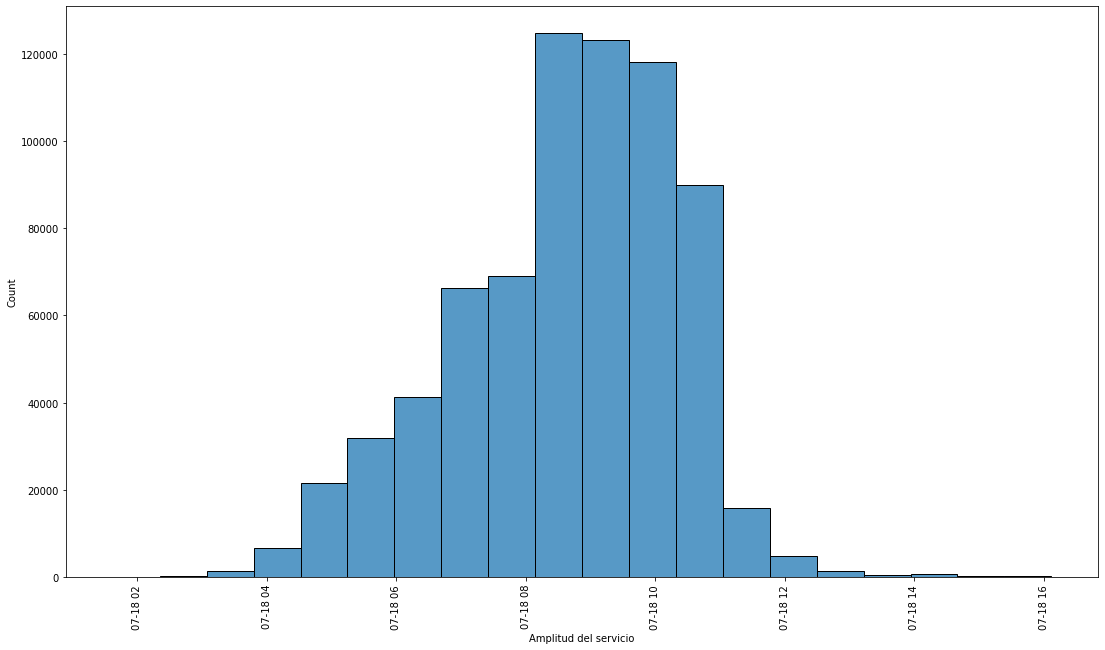

In [ ]:
fig,ax = plt.subplots()
sns.histplot(operator_data['Amplitud del servicio'], ax=ax, bins=20)
ax.tick_params(axis='x', rotation=90)

fig.set_size_inches(18.5,10.5)

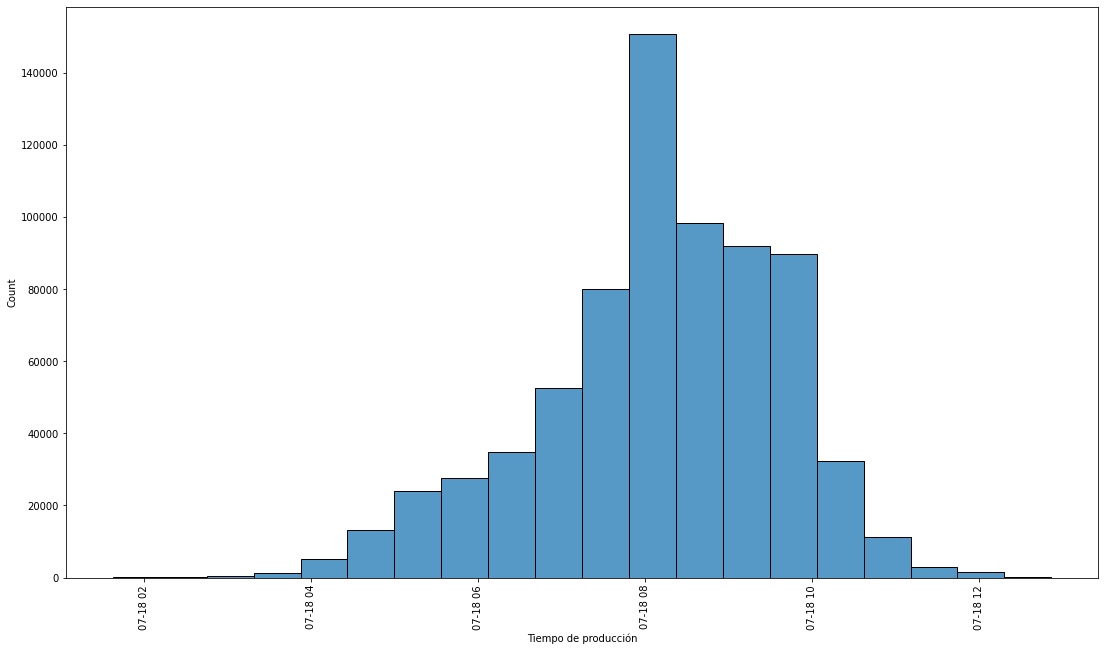

In [ ]:
fig,ax = plt.subplots()
sns.histplot(operator_data['Tiempo de producción'], ax=ax, bins=20)
ax.tick_params(axis='x', rotation=90)
fig.set_size_inches(18.5,10.5)

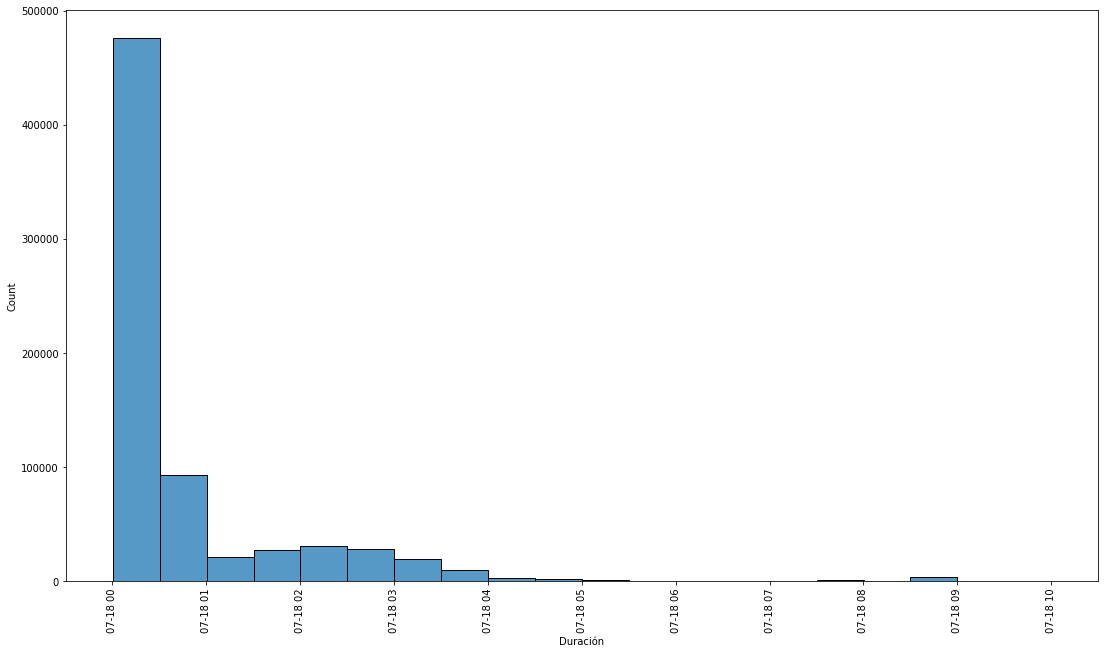

In [ ]:
fig,ax = plt.subplots()
sns.histplot(operator_data['Duración'], ax=ax, bins=20)
ax.tick_params(axis='x', rotation=90)
fig.set_size_inches(18.5,10.5)

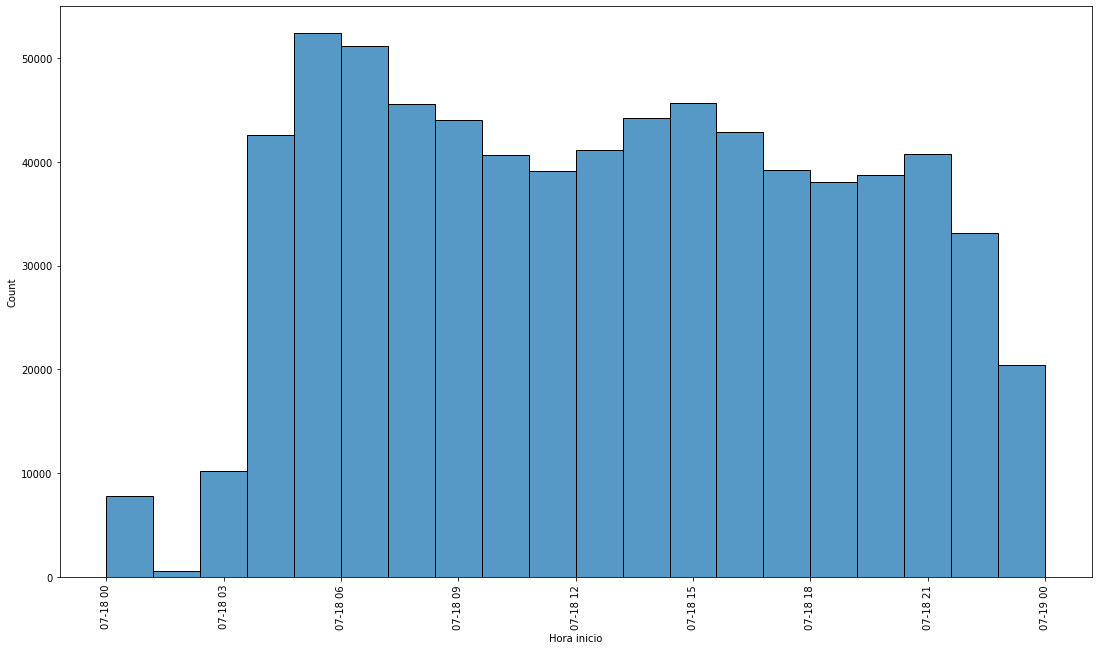

In [ ]:
fig,ax = plt.subplots()
sns.histplot(operator_data['Hora inicio'], ax=ax, bins=20)
ax.tick_params(axis='x', rotation=90)
fig.set_size_inches(18.5,10.5)

## Stops distance matrix

In [ ]:
distance_data = pd.read_csv( '/content/gdrive/MyDrive/data/Masivo_capital_6_Matriz_distancia/Reporte de Matriz Distancias - Paradas SAE_202104.csv',sep=';', encoding='latin-1')
distance_data

,StrLinea,ConfigAct,ConfigFecha,Sublinea,StrRuta,TipoNodo,Nodo,Nombre,Posicion,StrTipoServicio,Linea,ID Ruta
0,[121] DUAL80,8,8,294,[400] M80-L80 Normal,1,1970,PORTAL 20 DE JULIO T7,0,[5] PADRON,121,400
1,[121] DUAL80,8,8,294,[400] M80-L80 Normal,1,1940,Country Sur B - 4 ó 6,1129,[5] PADRON,121,400
2,[121] DUAL80,8,8,294,[400] M80-L80 Normal,1,1977,Av. 1º de Mayo B - 4 ó 6,1926,[5] PADRON,121,400
3,[121] DUAL80,8,8,294,[400] M80-L80 Normal,1,1939,Ciudad Jardín-UAN B - 4 ó 6,2554,[5] PADRON,121,400
4,[121] DUAL80,8,8,294,[400] M80-L80 Normal,1,1960,Policarpa A - 3 ó 6,3151,[5] PADRON,121,400
...,...,...,...,...,...,...,...,...,...,...,...,...
419555,[1195] HK707,1,2,3906,[5314] H707_202116_Vuelta_NS_V1,1,53407,076A12_Br. Puerta al Llano Rural,31436,[0] URBANO,1195,5314
419556,[1195] HK707,1,2,3906,[5314] H707_202116_Vuelta_NS_V1,1,53365,055A12_Br. Puerta al Llano Rural,32043,[0] URBANO,1195,5314
419557,[1195] HK707,1,2,3906,[5314] H707_202116_Vuelta_NS_V1,1,53364,054A12_Br. La Esperanza de Usme,33096,[0] URBANO,1195,5314
419558,[1195] HK707,1,2,3906,[5314] H707_202116_Vuelta_NS_V1,1,53406,075A12_Br. Puerta al Llano Rural,33691,[0] URBANO,1195,5314


In [29]:
distance_data['Nombre'] = distance_data['Nombre'].str.lower()
distance_data = distance_data.dropna(subset=['Nombre'])
distance_data[(distance_data['Nombre'].str.contains('103A02_MC'.lower()))]

,StrLinea,ConfigAct,ConfigFecha,Sublinea,StrRuta,TipoNodo,Nodo,Nombre,Posicion,StrTipoServicio,Linea,ID Ruta
2405,[148] 2-2 JARDIN,1,1,302,[417] 2-2,1,11855,103a02_mc,4502,[4] ALIMENTADOR,148,417
2418,[149] 2-6,1,1,303,[418] 2-6_,1,11855,103a02_mc,8387,[8] ALIMENTADOR_ESPECIAL,149,418


In [82]:
distance_data[(distance_data['Nombre'].str.contains('br. villa nhora'.lower()))]

,StrLinea,ConfigAct,ConfigFecha,Sublinea,StrRuta,TipoNodo,Nodo,Nombre,Posicion,StrTipoServicio,Linea,ID Ruta
91478,[1041] C701,1,1,3634,[4559] C701 20201121 V1,1,51064,012a09_br. villa nhora,30121,[0] URBANO,1041,4559
91581,[1041] C701,1,1,3650,[4617] C701 20201121 FESTIVO V1,1,51064,012a09_br. villa nhora,30324,[0] URBANO,1041,4617
104887,[1096] P44,1,1,4036,[5559] P44_20210412_V1,1,51064,012a09_br. villa nhora,13072,[0] URBANO,1096,5559


In [98]:
dates_al_suba['ruta_linea'] = dates_al_suba['Linea'].str.extract('\[.+\] (\S+)')[0]
dates_al_suba['Linea'] = dates_al_suba['Linea'].str.extract('\[(.+)\]')[0].astype('float')

In [73]:
dates_al_suba['Linea']

0       153.0
1       153.0
2       153.0
3       153.0
4       153.0
        ...  
5011    148.0
5012    148.0
5013    148.0
5014    148.0
5015    148.0
Name: Linea, Length: 143159, dtype: float64

In [121]:
distance_data[(distance_data['Nodo'] == 19179) & (distance_data['Linea'] == 779)]

,StrLinea,ConfigAct,ConfigFecha,Sublinea,StrRuta,TipoNodo,Nodo,Nombre,Posicion,StrTipoServicio,Linea,ID Ruta
83603,[779] T30A_,2,2,2414,[3142] T30A_Normal_V2,1,19179,079a12_br. san josé sur,11551,[0] URBANO,779,3142
395450,[779] T30A_,1,2,2120,[2811] T30_CIRCULAR,1,19179,079a12_br. san josé sur,11521,[0] URBANO,779,2811


In [138]:
merged_data_valid = valid_suba.merge(distance_data,how='left',on=['Nodo','Linea'])

array(['Viaje Inicial', 'Transbordo'], dtype=object)

In [139]:
merged_data_valid[(pd.isna(merged_data_valid['StrRuta'])) & (merged_data_valid['Parada'] != '(0) (Unknown)')]

,Fecha Clearing,Día Trx,Hora Trx,Operador,Ruta Modificada,Linea SAE,Parada,Tipo Vehiculo,Vehiculo,Tipo de Viaje,Linea,Nodo,StrLinea,ConfigAct,ConfigFecha,Sublinea,StrRuta,TipoNodo,Nombre,Posicion,StrTipoServicio,ID Ruta
5109,2021-03-29 00:00:00.0,29/03/2021,5:04:42,102,4993,1138,(51808) 003B11_TM|003B11_Br. San Benito,(02) Urbano,207011,Viaje Inicial,1138.0,51808.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7433,2021-03-29 00:00:00.0,29/03/2021,5:18:45,102,3811,920,(34090) 034A12_MC,(02) Urbano,204167,Transbordo,920.0,34090.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9492,2021-03-29 00:00:00.0,29/03/2021,5:30:41,102,3811,920,(34090) 034A12_MC,(02) Urbano,204039,Transbordo,920.0,34090.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9803,2021-03-29 00:00:00.0,29/03/2021,5:32:44,102,4251,394,(30796) 124A05_MC|124A05,(02) Urbano,202065,Viaje Inicial,394.0,30796.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12132,2021-03-29 00:00:00.0,29/03/2021,5:44:11,102,4251,394,(30796) 124A05_MC|124A05,(02) Urbano,202059,Transbordo,394.0,30796.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3935144,2021-04-26 00:00:00.0,26/04/2021,16:10:20,112,4388,1009,(42821) 052B09_MC|052B09,(02) Urbano,254709,Transbordo,1009.0,42821.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3959711,2021-04-26 00:00:00.0,26/04/2021,17:00:09,112,4388,1009,(42821) 052B09_MC|052B09,(02) Urbano,254688,Viaje Inicial,1009.0,42821.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3959808,2021-04-26 00:00:00.0,26/04/2021,17:00:16,112,4388,1009,(42821) 052B09_MC|052B09,(02) Urbano,254688,Viaje Inicial,1009.0,42821.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006912,2021-04-26 00:00:00.0,26/04/2021,18:24:41,112,4388,1009,(42821) 052B09_MC|052B09,(02) Urbano,254216,Transbordo,1009.0,42821.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
merged_data = dates_al_suba.merge(distance_data,how='left',on=['Nodo','Linea'])
merged_data

,Fecha,Operador,CodigoBus,NumeroBus,NumEventosBus,ServicioBus,Linea,Coche,ViajeLinea,OrdenViaje,IDViaje,Tipo,Nodo,Descripcion,HoraTeorica,HoraReferencia,HoraLlegada,HoraSalida,Evento,TiempoRegulacion,Alarma,TiempoAperturaPuertas,Conductor,NombreConductor,ruta_linea,StrLinea,ConfigAct,ConfigFecha,Sublinea,StrRuta,TipoNodo,Nombre,Posicion,StrTipoServicio,ID Ruta
0,1/04/2021,[102] SO,SO0103,16103,472 eventos,SO0F40005,153.0,2,0,1,1,Cochera,24,PATIO CIPRÉS,4:01:00,4:01:00,NaN,4:09:19,Inicio Viaje - Cocheras - Cocheras,0:00,NaN,0.0,200838.0,DAVID FERNANDO OCAMPO MARTINEZ,2-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/04/2021,[102] SO,SO0103,16103,472 eventos,SO0F40005,153.0,2,0,1,1,Parada,11891,CARGA_2-1,4:19:00,4:19:00,4:16:24,NaN,Fin Viaje,0:00,NaN,0.0,200838.0,DAVID FERNANDO OCAMPO MARTINEZ,2-1,[153] 2-1 MIRAND,2.0,2.0,1037.0,[1396] 2-1_V2,1.0,carga_2-1,0.0,[4] ALIMENTADOR,1396.0
2,1/04/2021,[102] SO,SO0103,16103,472 eventos,SO0F40005,153.0,2,0,1,1,Parada,11891,CARGA_2-1,4:19:00,4:19:00,4:16:24,NaN,Fin Viaje,0:00,NaN,0.0,200838.0,DAVID FERNANDO OCAMPO MARTINEZ,2-1,[153] 2-1 MIRAND,2.0,2.0,1037.0,[1396] 2-1_V2,1.0,carga_2-1,5686.0,[4] ALIMENTADOR,1396.0
3,1/04/2021,[102] SO,SO0103,16103,472 eventos,SO0F40005,153.0,2,0,1,1,Parada,11891,CARGA_2-1,4:19:00,4:19:00,4:16:24,NaN,Fin Viaje,0:00,NaN,0.0,200838.0,DAVID FERNANDO OCAMPO MARTINEZ,2-1,[153] 2-1 MIRAND,3.0,2.0,1232.0,[1626] 2-1_V3_Obras,1.0,carga_2-1,0.0,[4] ALIMENTADOR,1626.0
4,1/04/2021,[102] SO,SO0103,16103,472 eventos,SO0F40005,153.0,2,0,1,1,Parada,11891,CARGA_2-1,4:19:00,4:19:00,4:16:24,NaN,Fin Viaje,0:00,NaN,0.0,200838.0,DAVID FERNANDO OCAMPO MARTINEZ,2-1,[153] 2-1 MIRAND,3.0,2.0,1232.0,[1626] 2-1_V3_Obras,1.0,carga_2-1,4991.0,[4] ALIMENTADOR,1626.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549428,30/04/2021,[102] SO,SO0127,16127,362 eventos,CN12C0002,148.0,1,40,41,41,Parada,11864,101A02_MC,23:19:19,23:19:19,23:17:43,23:17:43,NaN,0:00,NaN,0.0,202622.0,CARLOS ANTONIO DELGADO DIAZ,2-2,[148] 2-2 JARDIN,1.0,1.0,302.0,[417] 2-2,1.0,101a02_mc,5275.0,[4] ALIMENTADOR,417.0
549429,30/04/2021,[102] SO,SO0127,16127,362 eventos,CN12C0002,148.0,1,40,41,41,Parada,11865,102A02_MC,23:20:50,23:20:50,23:18:13,23:18:13,NaN,0:00,NaN,0.0,202622.0,CARLOS ANTONIO DELGADO DIAZ,2-2,[148] 2-2 JARDIN,1.0,1.0,302.0,[417] 2-2,1.0,102a02_mc,5772.0,[4] ALIMENTADOR,417.0
549430,30/04/2021,[102] SO,SO0127,16127,362 eventos,CN12C0002,148.0,1,40,41,41,Parada,11888,DESCENSO_PLAT2,23:26:43,23:26:43,NaN,NaN,NaN,0:00,NaN,NaN,202622.0,CARLOS ANTONIO DELGADO DIAZ,2-2,[148] 2-2 JARDIN,1.0,1.0,302.0,[417] 2-2,1.0,descenso_plat2,7708.0,[4] ALIMENTADOR,417.0
549431,30/04/2021,[102] SO,SO0127,16127,362 eventos,CN12C0002,148.0,1,40,41,41,Parada,11891,CARGA_2-1,23:28:15,23:28:15,23:19:51,NaN,Fin Viaje - Linea,0:00,NaN,0.0,202622.0,CARLOS ANTONIO DELGADO DIAZ,2-2,[148] 2-2 JARDIN,1.0,1.0,302.0,[417] 2-2,1.0,carga_2-1,0.0,[4] ALIMENTADOR,417.0


In [90]:
paraderos = pd.read_excel('/content/gdrive/MyDrive/data/paraderos.xlsx')
paraderos

,RUTA,ORDEN,CENEFA,TIPO (M/S),Módulo,Cantidad MM,Estado del Múltiple,NOMBRE,DIRECCIÓN BANDERA,LOCALIDAD,Consola,Panel,Audio,Longitud,Latitud,ZONAS (nueva)
0,10-1,ALI001,109B09,M,B,2,(en blanco),Cementerio Jardines del Apogeo,CL 59 Sur - KR 77K,Bosa,CL 59 Sur - KR 77K (109B09),CL 59 Sur - KR 77K,Calle 59 Sur Carrera 77 K,-74.1776586,4.599540847,G
1,10-1,ALI002,012A09,S,A,1,No Aplica,Br. Villa Nhora,CL 59 Sur - KR 78B,Bosa,CL 59 Sur - KR 78B (012A09),CL 59 Sur - KR 78B,Calle 59 Sur Carrera 78 Be,-74.17909542,4.602795985,G
2,10-1,ALI003,010A09,S,A,1,No Aplica,Br. José Antonio Galán,CL 59 Sur - KR 78L,Bosa,CL 59 Sur - KR 78L (010A09),CL 59 Sur - KR 78L,Calle 59 Sur Carrera 78 L,-74.1804959,4.606737612,G
3,10-1,ALI004,238A09,S,A,1,No Aplica,Br. La Sultana del Sur,CL 60 Sur - KR 80D,Bosa,CL 60 Sur - KR 80D (238A09),CL 60 Sur - KR 80D,Calle 60 Sur Carrera 80 D,-74.18312384,4.609713388,G
4,10-1,ALI005,608A09,S,A,1,No Aplica,Br. El Limonar,KR 80K - CL 63 Sur,Bosa,KR 80K - CL 63 Sur (608A09),KR 80K - CL 63 Sur,Carrera 80 K Calle 63 Sur,-74.18564776,4.611065096,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38832,Z8,NOR100,369A01,S,A,1,No Aplica,Br. Las Orquídeas,KR 21 - CL 161A,Usaquén,KR 21 - CL 161A (369A01),KR 21 - CL 161A,Carrera 21 Calle 161 A,-74.04551293,4.742288212,B
38833,Z8,NOR101,077A01,S,A,1,No Aplica,Br. Estrella del Norte,AC 161 - KR 19A,Usaquén,AC 161 - KR 19A (077A01),AC 161 - KR 19A,Avenida Calle 161 Carrera 19 A,-74.04336345,4.740739084,B
38834,Z8,NOR102,309A01,S,A,1,No Aplica,Br. Estrella del Norte,AK 19 - CL 160,Usaquén,AK 19 - CL 160 (309A01),AK 19 - CL 160,Avenida Carrera 19 Calle 160,-74.04327185,4.739416541,B
38835,Z8,NOR103,308A01,S,A,1,No Aplica,Pquía. Santa María Magdalena,AK 19 - CL 154,Usaquén,AK 19 - CL 154 (308A01),AK 19 - CL 154,Avenida Carrera 19 Calle 154,-74.04367008,4.737692159,B


In [111]:
paraderos['NOMBRE'] = paraderos['NOMBRE'].str.lower()
paraderos['CENEFA'] = paraderos['CENEFA'].str.lower()
paraderos[paraderos['NOMBRE'].str.contains('DESCENSO'.lower())]

,RUTA,ORDEN,CENEFA,TIPO (M/S),Módulo,Cantidad MM,Estado del Múltiple,NOMBRE,DIRECCIÓN BANDERA,LOCALIDAD,Consola,Panel,Audio,Longitud,Latitud,ZONAS (nueva)


In [ ]:
DIST_PATH = "data/6. Reporte de Matriz Distancias - Paradas SAE/Reporte de Matriz Distancias - Paradas SAE_202104.csv"

In [ ]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

In [ ]:
df[(df['ID Ruta'] == 400) & (df['Posicion'] == 2)].sort_values(by='Posicion')

,StrLinea,ConfigAct,ConfigFecha,Sublinea,StrRuta,TipoNodo,Nodo,Nombre,Posicion,StrTipoServicio,Linea,ID Ruta


In [ ]:
df.to_csv('matriz_distancia.csv', encoding='utf-8-sig')

### Características del Dataset

COLUMNA    ----   -  TIPO    ---    DETALLE <br/>
StrLinea	 ---- -  texto	  ---  [ID línea SAE de la ruta] etiqueta de la ruta <br/>
ConfigAct	  ----  -numerco	  ---  Sin informacion <br/>
ConfigFecha	  -----  numerico---	Sin informacion <br/>
Sublinea	 ---- -  numerico---	ID de la sublinea de la ruta <br/>
StrRuta  	 ----  - texto	   --- [IDRuta SAE de la ruta] etiqueta de la ruta <br/>
TipoNodo	 ---- -  numerico---	Tipo de nodo <br/>
Nodo	     ----  - numerico	---ID SAE nodo de paso <br/>
Nombre	   ----  -   texto	 ---   Etiqueta del nodo <br/>
Posicion	 ---- -  numerico---	Posición del nodo dentro de la ruta <br/>
StrTipoServicio	-----texto	 ---   Tipo de servicio <br/>
Linea	    ----  -  numerico---	ID línea SAE de la ruta <br/>
ID Ruta 	----  -  numerico---	ID Ruta SAE de la ruta <br/>


In [ ]:
df = distance_data
#df = pd.read_csv(DIST_PATH, delimiter=";", encoding='latin-1')
df.columns

Index(['StrLinea', 'ConfigAct', 'ConfigFecha', 'Sublinea', 'StrRuta',
       'TipoNodo', 'Nodo', 'Nombre', 'Posicion', 'StrTipoServicio', 'Linea',
       'ID Ruta'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419560 entries, 0 to 419559
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   StrLinea         419560 non-null  object
 1   ConfigAct        419560 non-null  int64 
 2   ConfigFecha      419560 non-null  int64 
 3   Sublinea         419560 non-null  int64 
 4   StrRuta          419560 non-null  object
 5   TipoNodo         419560 non-null  int64 
 6   Nodo             419560 non-null  int64 
 7   Nombre           419559 non-null  object
 8   Posicion         419560 non-null  int64 
 9   StrTipoServicio  419560 non-null  object
 10  Linea            419560 non-null  int64 
 11  ID Ruta          419560 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 38.4+ MB


In [ ]:
df.head()

,StrLinea,ConfigAct,ConfigFecha,Sublinea,StrRuta,TipoNodo,Nodo,Nombre,Posicion,StrTipoServicio,Linea,ID Ruta
0,[121] DUAL80,8,8,294,[400] M80-L80 Normal,1,1970,PORTAL 20 DE JULIO T7,0,[5] PADRON,121,400
1,[121] DUAL80,8,8,294,[400] M80-L80 Normal,1,1940,Country Sur B - 4 ó 6,1129,[5] PADRON,121,400
2,[121] DUAL80,8,8,294,[400] M80-L80 Normal,1,1977,Av. 1º de Mayo B - 4 ó 6,1926,[5] PADRON,121,400
3,[121] DUAL80,8,8,294,[400] M80-L80 Normal,1,1939,Ciudad Jardín-UAN B - 4 ó 6,2554,[5] PADRON,121,400
4,[121] DUAL80,8,8,294,[400] M80-L80 Normal,1,1960,Policarpa A - 3 ó 6,3151,[5] PADRON,121,400


### Pares de Rutas - Líneas con mayor ocurrencia

In [ ]:
def unique_columns(df,columns):

    result = pd.Series(index = df.index)

    groups = meta_data_csv.groupby(by = columns)
    for name,group in groups:
        is_unique = len(group) == 1
        result.loc[group.index] = is_unique

    assert not result.isnull().any()

    return result

rutas_comunes = df.groupby(['Linea','ID Ruta']).size().reset_index().rename(columns={0:'count'})

In [ ]:
rutas_comunes.sort_values(by=["count"], ascending=False)

,Linea,ID Ruta,count
1174,184,2680,696
3050,595,2318,654
3044,595,1511,630
3579,773,2675,605
3976,959,4046,594
...,...,...,...
2088,325,1583,2
490,96,205,1
670,121,389,1
3982,960,4041,1


### Valores únicos

In [ ]:
lineas = df.Linea.unique()
print("Número de líneas únicas: ", len(lineas) )
id_rutas = df["ID Ruta"].unique()
print("Número de rutas únicas: ", len(id_rutas))

Número de líneas únicas:  794
Número de rutas únicas:  1385


### Valores Nulos

In [ ]:
df.isnull().sum()

StrLinea           0
ConfigAct          0
ConfigFecha        0
Sublinea           0
StrRuta            0
TipoNodo           1
Nodo               1
Nombre             1
Posicion           1
StrTipoServicio    1
Linea              1
ID Ruta            1
dtype: int64

### Histograma datos por columna

In [19]:
for column in df:
    plt.figure(column)
    plt.title(column)
    if ptypes.is_numeric_dtype(df[column]):
        df[column].plot(kind="hist", color="red")
    elif ptypes.is_string_dtype(df[column]):
        df[column].value_counts()[:10].plot(kind="bar", color="red")

NameError: ignored

# Pruebas


In [ ]:
def relate_nodes(x):
  for  index, location in distance_data.iterrows():
    if x.lower() in location['Nombre'].lower():
      return location.iloc[index]['Nodo']


related_node = dates_al_suba['Descripcion'].apply(relate_nodes)